# 1. Introduction

<!-- Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai. -->
## Project 2

```
Nama        : Reski Hidayat

Objective   : 
This program is made to predict Credit Card Fraud using Model Classification.


```

# 2. Import Libraries

In [71]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# libraries Data Preprocessing
from sklearn.model_selection import train_test_split # splittingdata
from feature_engine.outliers import Winsorizer # outlier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler # scalling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # encoder
from imblearn.over_sampling import SMOTE # balancing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score, make_scorer

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Library handling outlier
from feature_engine.outliers import Winsorizer

# Pemodelan ML
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

from collections import Counter

# lib pipelines
from sklearn.pipeline import Pipeline

# Save model
import pickle
import joblib
import json

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

This dataset offers a variety of attributes valuable for comprehensive analysis. It contains 555,719 instances and 22 attributes, a mix of categorical and numerical data types. Importantly, the dataset is complete with no null values. Here's a breakdown of the attributes:

| Feature | Description |
| :--- | :--- |
| Trans_date_trans_time | Timestamp of the transaction (date and time).|
| Cc_num | Unique customer identification number. |
| Merchant | The merchant involved in the transaction. |
| Category | Transaction type (e.g., personal, childcare). |
| Amt | Transaction amount. |
| First | Cardholder's first name. |
| Last | Cardholder's last name. |
| Gender | Cardholder's gender. |
| Street | Cardholder's street address. |
| City | Cardholder's city of residence. |
| State | Cardholder's state of residence. |
| Zip | Cardholder's zip code. |
| Lat | Latitude of cardholder's location. |
| Long | Longitude of cardholder's location. |
| City_pop | Population of the cardholder's city. |
| Job | Cardholder's job title. |
| Dob | Cardholder's date of birth. |
| Trans_num | Unique transaction identifier. |
| Unix_time | Transaction timestamp (Unix format). |
| Merch_lat | Merchant's location (latitude). |
| Merch_long | Merchant's location (longitude). |
| Is_fraud | Fraudulent transaction indicator (1 = fraud, 0 = legitimate). This is the target variable for classification purposes.|

In [4]:
# Data Loading

fraud = pd.read_csv('fraud_test.csv')

# Define the percentage of data you want to sample
sample_percentage = 50  # Adjust this percentage as needed

# Randomly sample the data based on the percentage
data = fraud.sample(frac=sample_percentage/100, random_state=22)  # Set a random seed for reproducibility

Loading data from [Kaggle.com](https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction/data). Since the data have 500+k data so we do 50% sampling because due to computational limitations.

In [5]:
data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
232018,232018,13/09/2020 03:24,3.741250e+14,"fraud_Daugherty, Pouros and Beahan",shopping_pos,3.08,Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,...,38.9757,-77.0282,601723,"Optician, dispensing",20/07/1970,25ace93974336dbb7062cf3a26887d74,1379042693,38.957832,-76.780390,0
50019,50019,07/07/2020 23:30,4.128730e+18,"fraud_Haley, Batz and Auer",health_fitness,11.36,Monique,Martin,F,68276 Matthew Springs,...,31.3833,-95.0619,43,"Engineer, production",04/10/1949,11b04fc37219e2ebd23a9cd0d0a2dccb,1373239842,31.343021,-94.765200,0
45979,45979,06/07/2020 22:58,2.131120e+14,"fraud_Witting, Beer and Ernser",home,33.61,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),03/06/1984,86b6315b69585f8131d74db2f5aa976c,1373151482,33.870079,-82.745760,0
521560,521560,24/12/2020 07:25,4.292740e+18,fraud_Kuhic Inc,grocery_pos,92.11,Michael,Williams,M,35822 Clayton Street Apt. 679,...,38.2674,-76.4954,5927,Art therapist,09/06/1973,ed9659f0c2e65e2d0efd21942fa3dd96,1387869909,39.034560,-76.486413,0
29680,29680,30/06/2020 22:08,2.131120e+14,"fraud_Mante, Luettgen and Hackett",health_fitness,35.29,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),03/06/1984,458143419f0260eb537c483c3c7cfd45,1372630136,34.518228,-83.018716,0
158222,158222,16/08/2020 03:09,3.769440e+14,fraud_Marks Inc,gas_transport,58.52,Tiffany,Stephens,F,1447 Ryan Lodge,...,30.4983,-88.3282,15647,"Scientist, physiological",26/12/1957,a2bab668674fb6d17762f65eefa55721,1376622549,31.060684,-88.422005,0
307397,307397,15/10/2020 18:40,5.836990e+11,fraud_Hammes-Beatty,kids_pets,59.17,Jennifer,Jones,F,5572 Kelly Plains Apt. 952,...,44.3481,-89.1101,15426,"Engineer, civil (contracting)",22/07/1936,5943123ce7218bf1f704628cb0964031,1381862436,44.366279,-88.891077,0
211905,211905,04/09/2020 02:09,3.013180e+13,fraud_Maggio-Fahey,misc_pos,154.77,Brianna,Foley,F,57256 Raymond Ports,...,35.9335,-84.1481,391389,"Designer, industrial/product",22/04/1994,8c3d64c313d91046175d74b4736efe62,1378260552,35.933339,-83.279825,0
287934,287934,06/10/2020 18:56,4.683640e+12,fraud_Daugherty LLC,kids_pets,40.52,Daniel,Boyd,M,8925 Nicholas Points,...,30.2510,-92.5002,1261,Broadcast presenter,01/07/1972,b45894c227f4b019129ca0b1da76700c,1381085762,29.398881,-92.093834,0
36988,36988,04/07/2020 09:42,6.011370e+15,fraud_Spinka Inc,grocery_net,39.74,Adam,Stark,M,0912 Mark Fields Apt. 080,...,40.5046,-77.7186,4653,Nutritional therapist,01/07/1997,78b37edd2c94ea7e019c19dc018b66c4,1372930970,39.963238,-77.702845,0


Showing the first 10 data from the DataFrame

In [6]:
data.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
293591,293591,09/10/2020 22:27,3.530500e+15,"fraud_Kilback, Nitzsche and Leffler",travel,4.19,David,Nichols,M,0638 Fred Ramp Suite 086,...,34.5715,-118.0231,171170,Chemical engineer,04/06/1963,e8882367bb7b166b03ae97f291c263ff,1381357644,35.323561,-117.798785,0
526137,526137,25/12/2020 15:34,3.568740e+15,fraud_Kuphal-Toy,food_dining,54.67,Thomas,Cross,M,7566 Thompson Creek Apt. 827,...,41.8114,-93.4855,1195,Trading standards officer,13/03/1974,39cc6947828806fac01d1146ebc1f5d6,1387985698,42.548066,-94.362563,0
12105,12105,25/06/2020 03:48,6.011890e+15,"fraud_Swaniawski, Bahringer and Ledner",grocery_net,32.78,Erin,Chavez,F,3379 Williams Common,...,39.5994,-105.0044,320420,Water engineer,31/07/1975,d401e8be702b51bf13b0d432036294e7,1372132084,39.376623,-104.395380,0
500875,500875,20/12/2020 05:49,4.471570e+12,fraud_Morissette PLC,shopping_pos,7.90,Dakota,Maldonado,M,369 Cochran Radial,...,36.4899,-79.4736,3402,Insurance underwriter,24/10/1927,e5c8cb5dd91b8fe72956764379e67f81,1387518580,37.082387,-79.232425,0
182,182,21/06/2020 13:15,2.131580e+14,"fraud_Lubowitz, Terry and Stracke",personal_care,23.23,Tara,Campbell,F,05050 Rogers Well Apt. 439,...,41.6060,-109.2300,27971,Music therapist,01/08/1984,c6fe3189d929456a779d341498fb177b,1371820551,42.096035,-109.177709,0
3623,3623,22/06/2020 12:07,3.036410e+13,fraud_Hickle Group,shopping_pos,8.05,Samuel,Sandoval,M,0005 Morrison Land,...,35.8896,-96.0887,7163,Fitness centre manager,05/02/1982,467bf7ed696ddda84dd7af2e3793a49e,1371902842,35.973827,-95.544104,0
301755,301755,13/10/2020 01:50,4.103160e+12,fraud_Herzog Ltd,misc_pos,30.91,Christopher,Adkins,M,3512 Knight Center,...,33.6666,-101.5277,1571,Petroleum engineer,27/06/1982,dacd09a3a77b6cd5331dded8f07060ff,1381629010,33.279507,-102.213415,0
47518,47518,07/07/2020 10:31,4.005680e+15,fraud_O'Keefe-Hudson,grocery_pos,64.63,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,2edbd424b669608cc8a3348c7dbae673,1373193118,30.011657,-90.937415,0
317700,317700,20/10/2020 01:14,3.583640e+15,fraud_Kerluke PLC,misc_net,100.81,Crystal,Gamble,F,899 Michele View Suite 960,...,40.0369,-75.0664,1526206,Structural engineer,01/01/1985,f84fa024d25921115f4ba7f83d6e5f02,1382231688,40.654485,-74.948465,0
273475,273475,30/09/2020 14:25,3.429520e+14,fraud_Dickinson Ltd,personal_care,31.16,Kayla,Jones,F,6033 Young Track Suite 804,...,42.0158,-73.2913,647,Comptroller,26/09/1987,c8113669a96a6b2ca117002fb4efe3ca,1380551140,41.811544,-72.925090,0


Showing last 10 data from the DataFrame

In [7]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)

Dropping index row from the CSV file

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277860 entries, 232018 to 273475
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  277860 non-null  object 
 1   cc_num                 277860 non-null  float64
 2   merchant               277860 non-null  object 
 3   category               277860 non-null  object 
 4   amt                    277860 non-null  float64
 5   first                  277860 non-null  object 
 6   last                   277860 non-null  object 
 7   gender                 277860 non-null  object 
 8   street                 277860 non-null  object 
 9   city                   277860 non-null  object 
 10  state                  277860 non-null  object 
 11  zip                    277860 non-null  int64  
 12  lat                    277860 non-null  float64
 13  long                   277860 non-null  float64
 14  city_pop               277860 non-nu

* From the information above we can see the `trans_date_trans_time` type still object, so we gonna change the format later in Feature Engineering
* There is 277860 data since we to sampling before. It still optimal for our analysis with 12 row with `object` type and 10 data with `numeric` type

In [9]:
data['is_fraud'].value_counts()

is_fraud
0    276743
1      1117
Name: count, dtype: int64

There is 1117 data detected as fraud while 276743 data is detected as legit transaction. We can say the data is imbalanced

In [10]:
data['job'].value_counts()

job
Film/video editor                2069
Exhibition designer              2012
Naval architect                  1844
Surveyor, land/geomatics         1838
Materials engineer               1720
                                 ... 
Engineer, civil (consulting)       94
Conservator, furniture             85
Software engineer                   7
Engineer, water                     4
Operational investment banker       4
Name: count, Length: 478, dtype: int64

There are 478 types of jobs that carry out transactions with Film/Video Editor become the most with 2069 data

In [11]:
data['merchant'].value_counts()

merchant
fraud_Kilback LLC                        964
fraud_Cormier LLC                        817
fraud_Kuhn LLC                           779
fraud_Dickinson Ltd                      777
fraud_Schumm PLC                         769
                                        ... 
fraud_McLaughlin, Armstrong and Koepp    160
fraud_Larson, Quitzon and Spencer        160
fraud_Kozey-McDermott                    158
fraud_Satterfield-Lowe                   151
fraud_Ritchie, Bradtke and Stiedemann    141
Name: count, Length: 693, dtype: int64

There are 693 merchant that serve the transaction with Kilback LLC become the most with 964 data

In [12]:
data.shape

(277860, 22)

The DataFrame have 277860 rows and 22 columns

# 4. Exploratory Data Analysis (EDA)

In [13]:
# Duplicate Dataset
data_duplicate = data.copy()

Creating duplicate DataFrame as restore point

In [14]:
# Cek Duplikat
print(f'Duplicate Data : {data.duplicated().sum()}')

Duplicate Data : 0


There are no duplicate data in DataFrame so we will not handle anything

In [15]:
print(f'Missing Value Data :')
print(f'{data.isna().sum()}')

Missing Value Data :
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


There is no Missing Value in DataFrame so we will not handle anything

In [16]:
# IQR outlier detection function
def deteksi_outlier(df, threshold=1.5):
    ''' Fungsi IQR
    Perameters:
    - df (pandas Dataframe)
    - threshold penyesuaian iqr

    penggunaan:
    - deteksi_outlier(df=data)'''
    outliers= {}
    percentages = {}

    for col in df.columns:
        if df[col].dtypes != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)

            iqr = (q3 - q1)

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            check_outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers[col]= len(check_outlier)

            if len(df[col]) != 0:
                percentage_outlier = len(check_outlier) * 100 / len(df[col])
            else:
                percentage_outlier = 0

            percentages[col] = "{:.2f}%".format(percentage_outlier)

    data = pd.DataFrame({
        'Column Name': list(outliers.keys()),
        'Outlier Percentage': list(percentages.values())
    })

    return data


Detection the outlier using IQR method

In [17]:
# define outlier dataframe
outlier = deteksi_outlier(df=data)
outlier

,Column Name,Outlier Percentage
0,cc_num,9.17%
1,amt,5.01%
2,zip,0.00%
3,lat,0.37%
4,long,3.80%
5,city_pop,18.74%
6,unix_time,0.00%
7,merch_lat,0.39%
8,merch_long,3.18%
9,is_fraud,0.40%


There no significant outlier percentage except `city_pop` as the most with 18.74% outlier, so we will handle it later in Feature Engineering

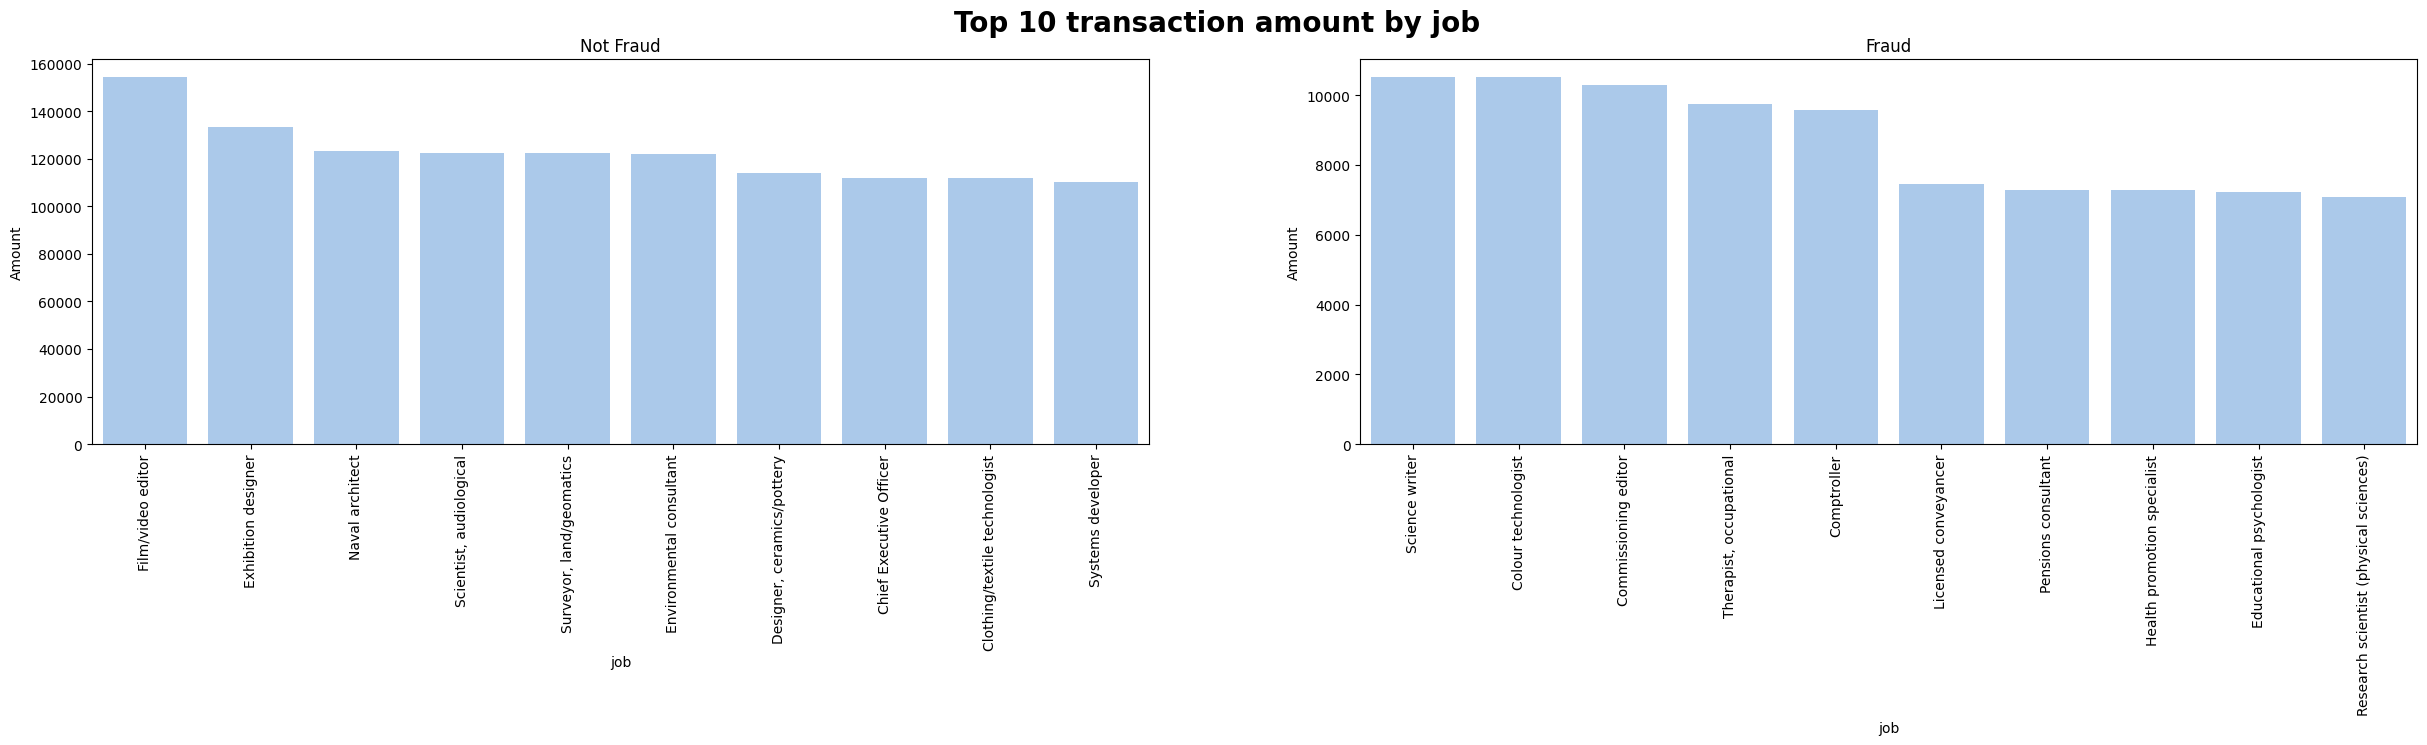

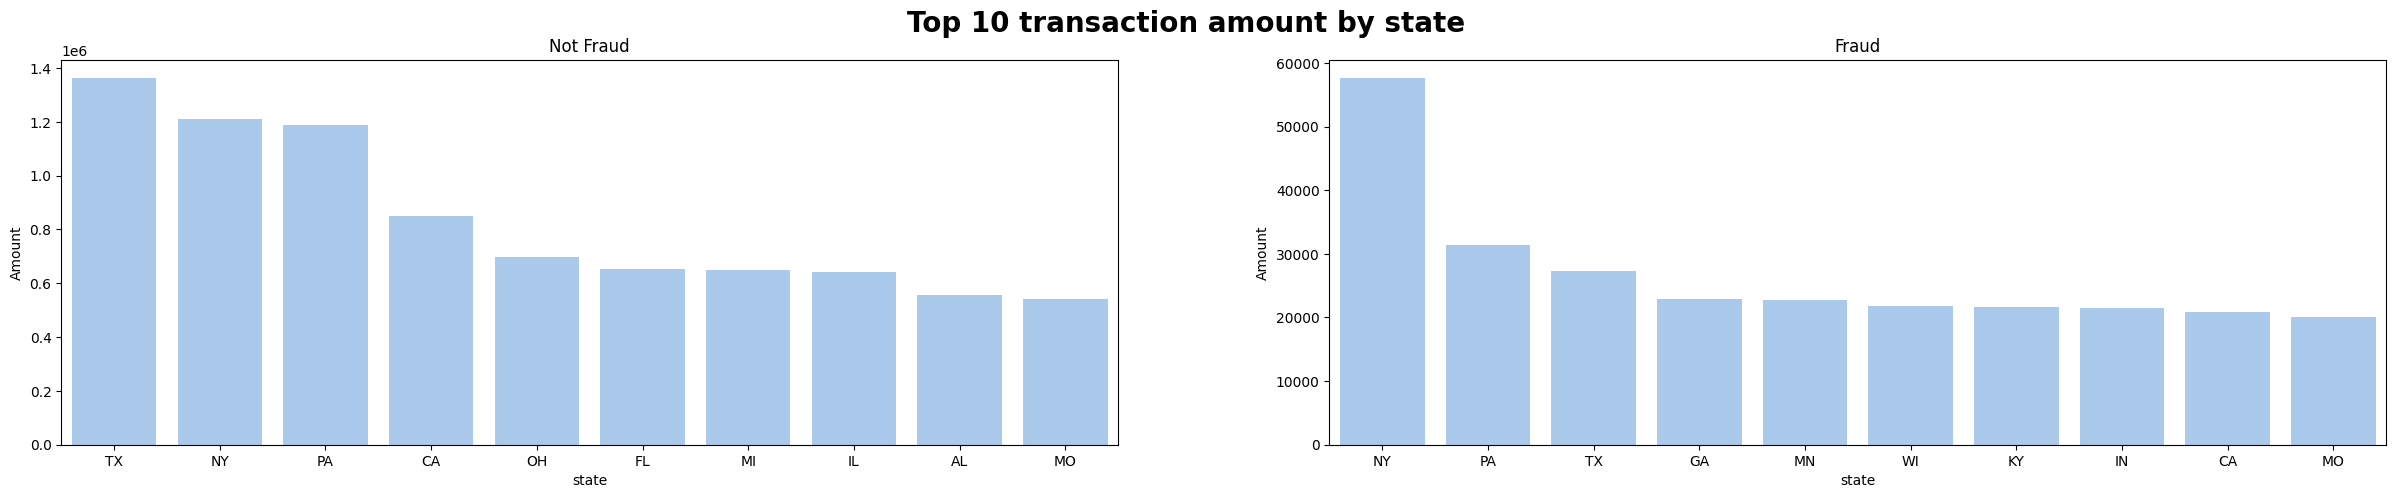

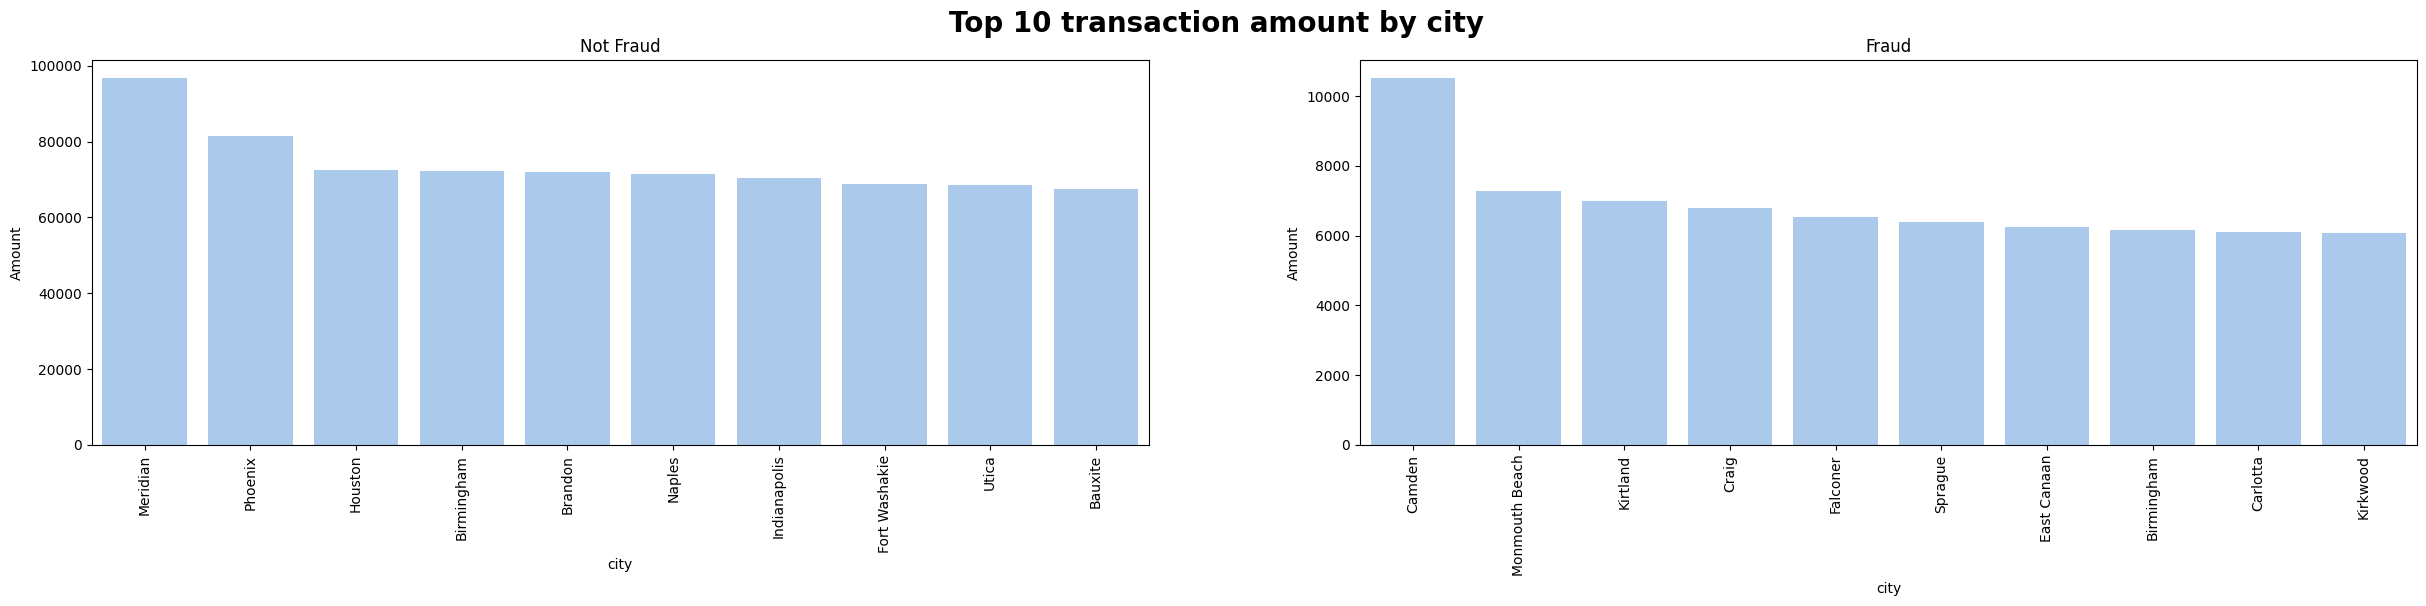

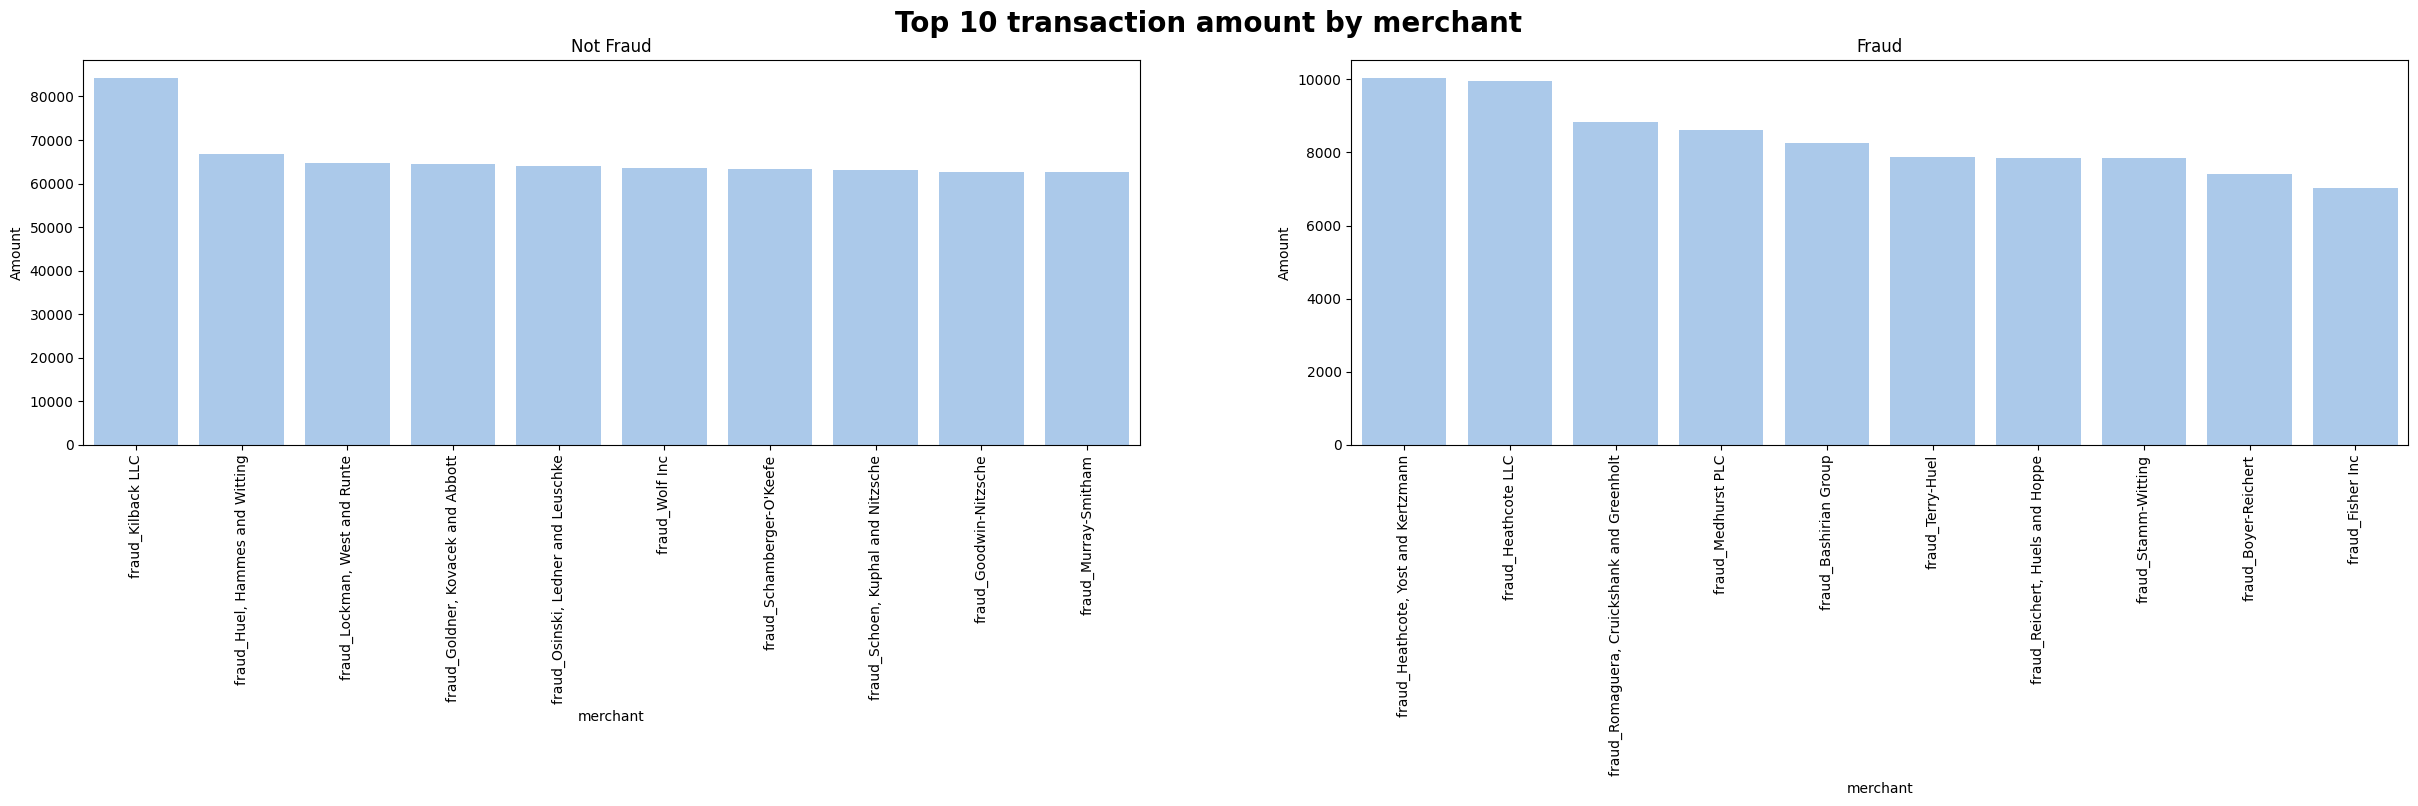

In [18]:
#TOP Transaction Amount
columns = ['job','state','city','merchant']
columns_name = ['job','state','city','merchant']
fraud = ['Not Fraud','Fraud']
y = 0 
for col in columns:
    name = columns_name[y]
    y += 1
    fig = plt.figure(figsize=(30, 5))
    plt.suptitle("Top 10 transaction amount by " + name, fontsize=20,fontweight="bold")
    
    for i in range(0,len(fraud)):
        temp_data = data[data['is_fraud'] == i]
        top = temp_data.groupby(col)['amt'].sum().nlargest(10)
        plt.subplot(1,2,1+i)
        ax = sns.barplot(data = top.reset_index(), x = col, y='amt', color='#a1c9f4')
        if (col == 'state'):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.ylabel('Amount')
        plt.xlabel(name)
        plt.title(fraud[i])
    plt.show()

* From the top 10 transaction amount by job we can see `Science Writer` have the most fraud with over 10.000 transaction amount meanwhile `Film/Video editor` are the most non fraud with almost 160.000 transaction
* From the top 10 transaction amount by state we can see `NY` have the most fraud with almost 60.000 transaction amount meanwhile `TX`are the most non fraud with above 1.400.000 transaction
* From the top 10 transaction amount by city we can see `Camden` have the most fraud with over 10.000 transaction amount meanwhile `Meridian` are the most non fraud with almost 100.000 transaction
* From the top 10 transaction amount by merchant we can see `Heathcote, Yost and Kertzmann` have most fraud with almost 10.000 transaction amount meanwhile `Killback-LLC` are the most non fraud with over 80.000 transaction

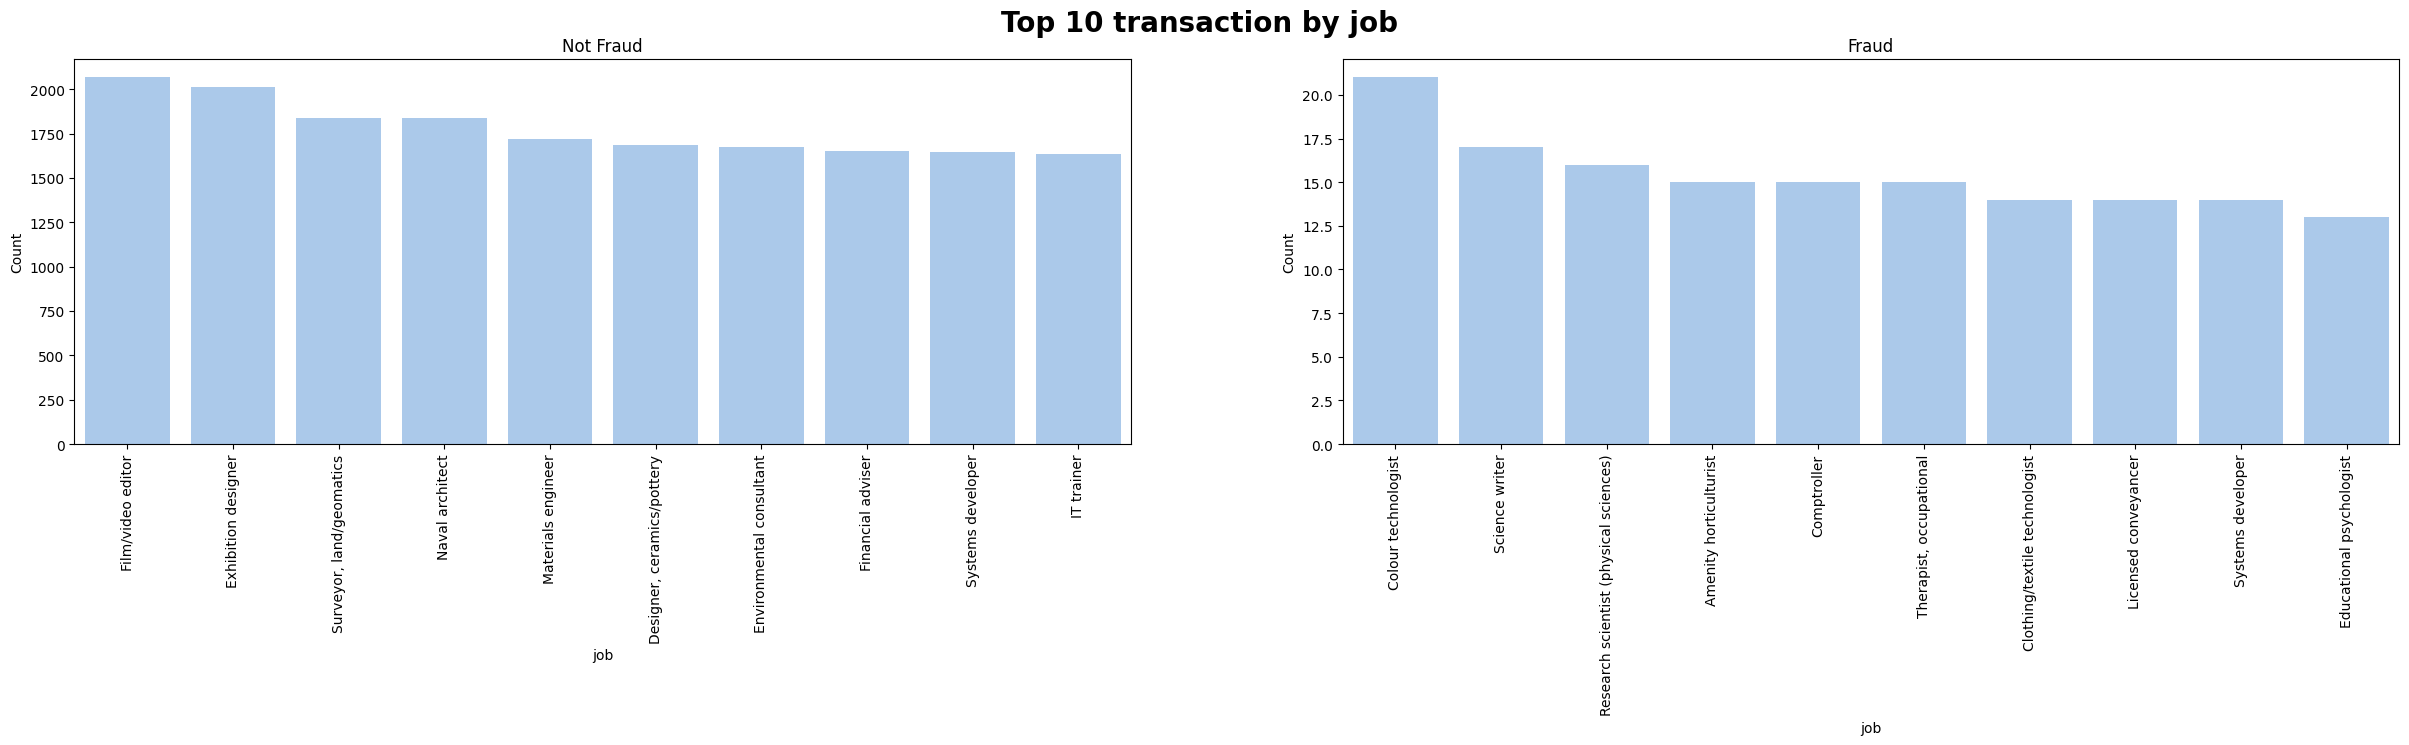

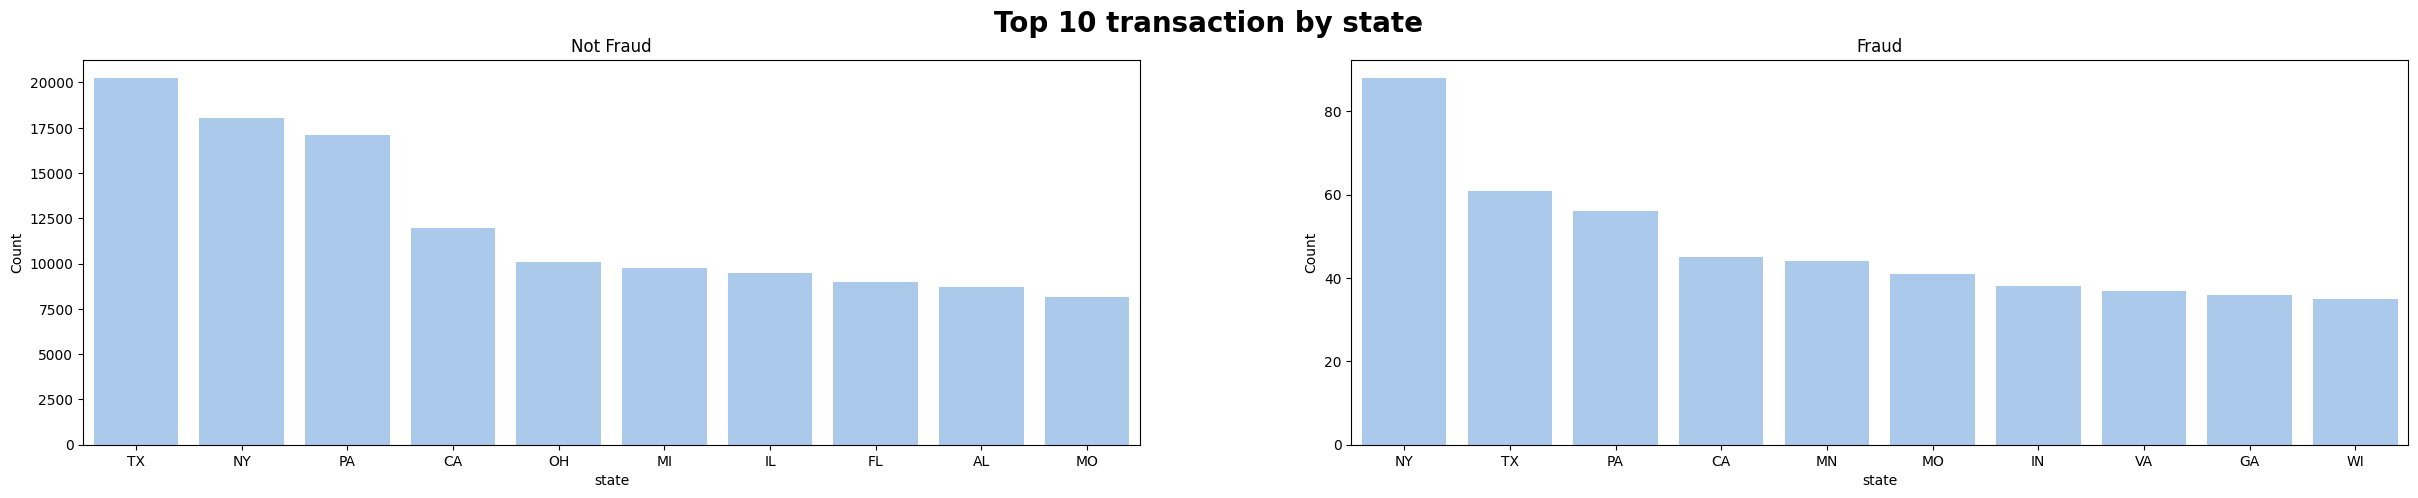

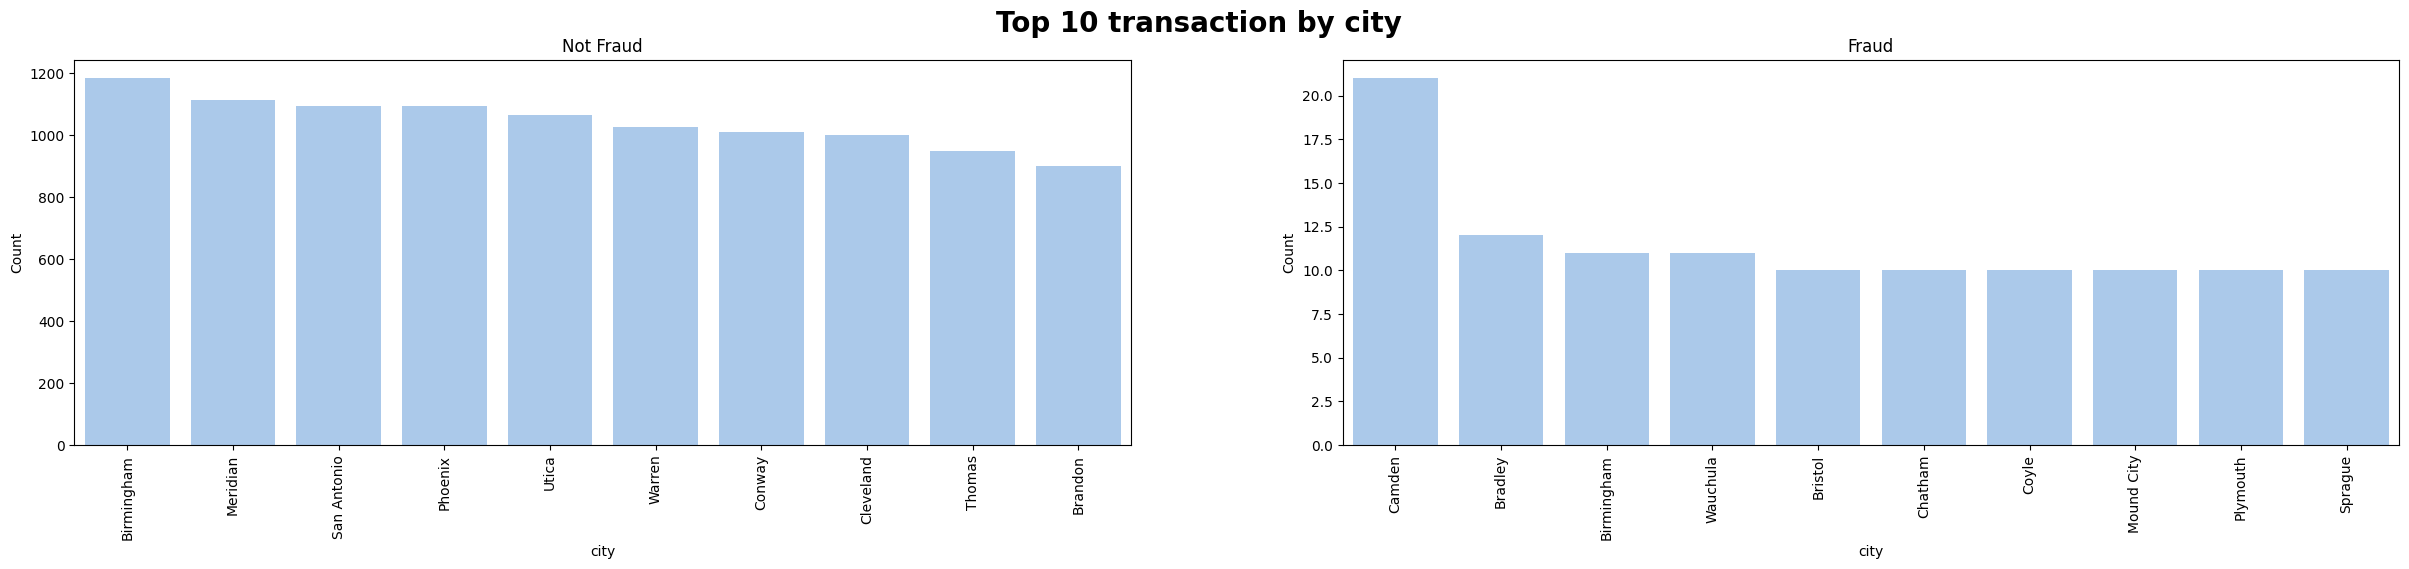

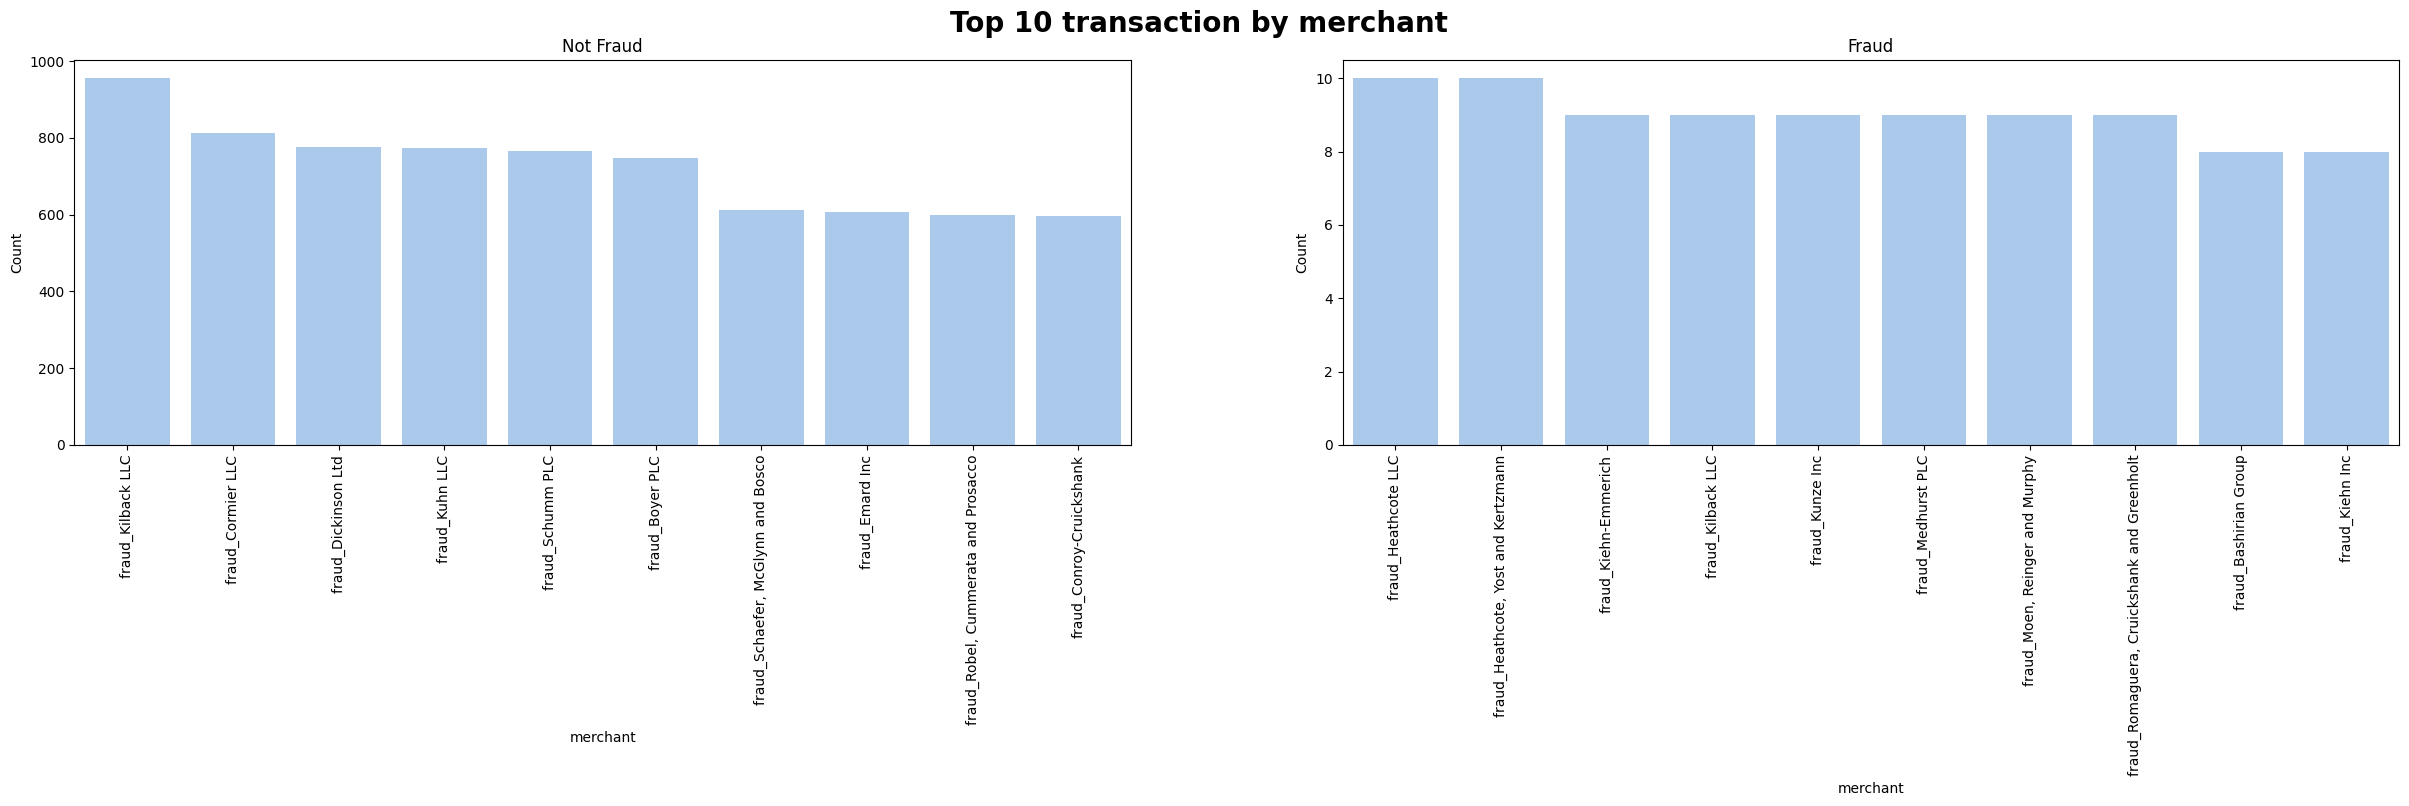

In [19]:
#By Transaction count
columns = ['job','state','city','merchant']
columns_name = ['job','state','city','merchant']
fraud = ['Not Fraud','Fraud']
y = 0 
for col in columns:
    sns.set_palette("pastel")
    name = columns_name[y]
    y += 1
    fig = plt.figure(figsize=(30, 5))
    if (col == 'trans_dayOfWeek'):
        plt.suptitle("Top transaction by " + name, fontsize=20,fontweight="bold")
    else:
        plt.suptitle("Top 10 transaction by " + name, fontsize=20,fontweight="bold")   
    for i in range(0,len(fraud)):
        temp_data = data[data['is_fraud'] == i]
        top = temp_data.groupby(col).size().nlargest(10)
        plt.subplot(1,2,1+i)
        ax = sns.barplot(data = top.reset_index(), x = col, y=0, color='#a1c9f4')
        if (col == 'state'):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.ylabel('Count')
        plt.xlabel(name)
        #plt.axhline(temp_data.groupby(col).size().mean(), color='red', linestyle='--')
        plt.title(fraud[i])
    plt.show()

* From the top 10 transaction by job we can see `Color Technologist` have the most fraud with over 20 transaction meanwhile `Film/Video editor` are the most not fraud with over 2.000 transaction
* From the top 10 transaction by state we can see `NY` have the most fraud with over 80 transaction meanwhile `TX`are the most not fraud with 20.000 transaction
* From the top 10 transaction by city we can see `Camden` have the most fraud over 20 transaction meanwhile `Birmingham` are the most not fraud with almost 1.200 transaction
* From the top 10 transaction by merchant we can see `Healthcore LLC.` have most fraud with 10 transaction meanwhile `Killback LLC.` are the most not fraud with almost 1.000 transaction

In [24]:
#calculate age
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (2020  - data['dob'].dt.year)

Calculating the age of cardholder based on their date of birth

In [25]:
data['age'].unique()

array([50, 71, 36, 47, 63, 84, 26, 48, 23, 43, 49, 29, 76, 58, 28, 25, 37,
       17, 72, 39, 42, 70, 15, 80, 41, 35, 34, 61, 44, 55, 59, 60, 78, 33,
       64, 56, 65, 68, 21, 81, 27, 46, 57, 40, 30, 66, 31, 24, 51, 38, 20,
       45, 74, 67, 94, 32, 69, 77, 54, 89, 75, 22, 79, 52, 87, 53, 83, 62,
       73, 19, 92, 93, 82, 85, 16, 91, 88, 86, 90, 96, 18])

Showing the unique value of age

In [26]:
print("Min age", data['age'].min())
print("Max age", data['age'].max())

Min age 15
Max age 96


- Minimum age of cardholder is 15
- Maximum age of cardholder is 96

In [27]:
def apply_age_group(age):
    if(age <= 18):
        return 'Teenager'
    elif (age <= 25):
        return "Young Adult"
    elif (age <= 64):
        return "Adult"
    else:
        return "Elder"

In [28]:
data['age_group'] = data['age'].apply(apply_age_group)

Creating function to grouping the cardholder age

In [92]:
def annotate_bar(ax, custom_y_func, font_size = 14):
    """
    Annotate each bar in the axis with its height value.

    Parameters:
    ax (matplotlib.axes.Axes): The axis object to annotate.
    custom_y_func (callable): A custom function to transform the y-coordinate of the annotation.
    font_size (int, optional): The font size of the annotation (default is 14).
    """
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(), 1))
        x = (p.get_x() + p.get_width() / 2) * 0.99
        y = ((p.get_y() + p.get_height() / 2) * 0.99)
        
        y = custom_y_func(y)
        ax.annotate(
            value,
            (x,y),
            color="black",
            size= font_size, ha='center', va='center'
        )

Creating function for annotation bar

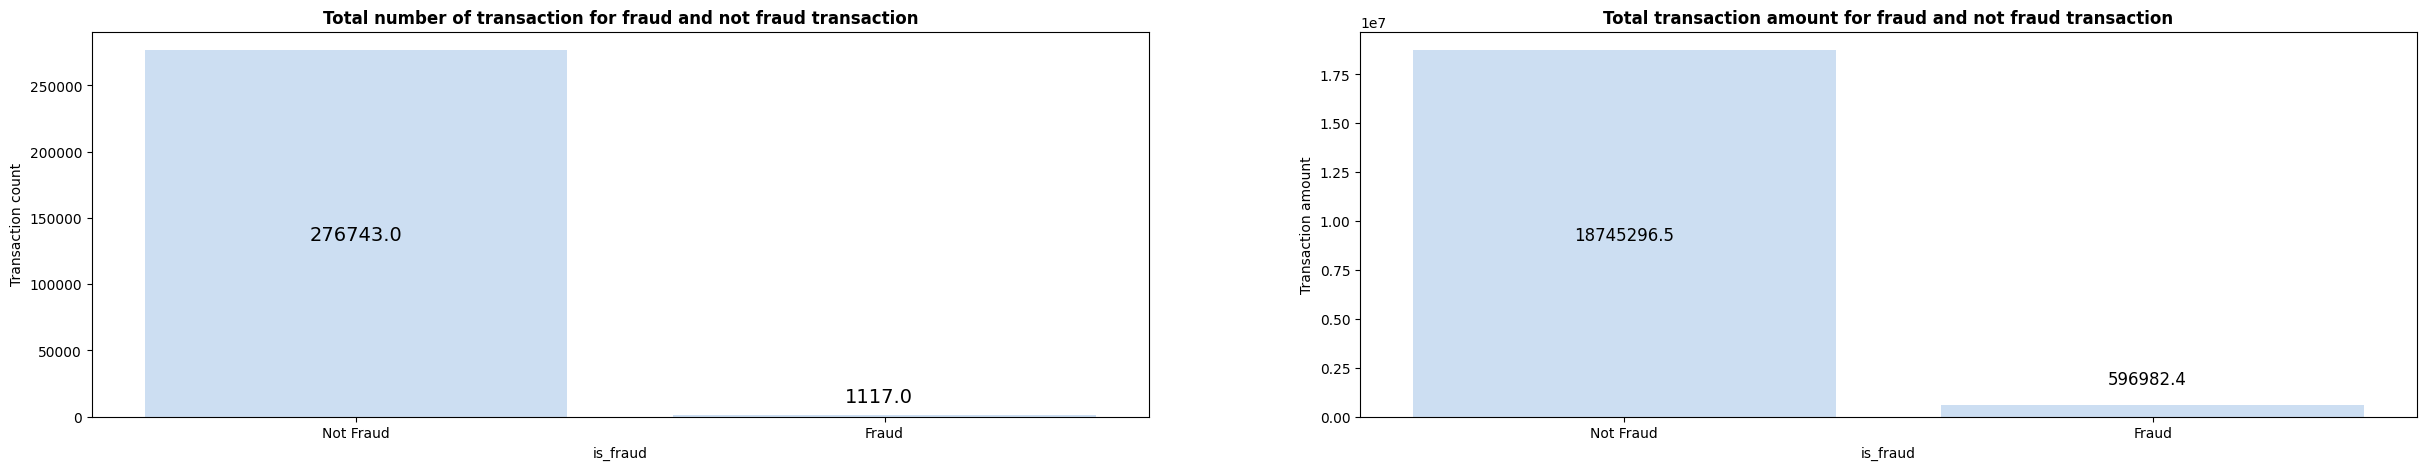

In [93]:
fig = plt.figure(figsize=(30, 5))

plt.subplot(1,2,1)
data_fraud_count = data['is_fraud'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud').value_counts().reset_index()
ax = sns.barplot(data = data_fraud_count, x = 'is_fraud', y='count', color='#c6def8')
#ax = data_fraud_count.plot(kind="bar", figsize=(15,5), title='Number of fraud and not fraud transaction')

# because no of fraud case to too small we set y to a fixed value to display in the chart 
annotate_bar(ax, lambda y: 15000 if y < 10000 else y, font_size = 14,)
plt.title('Total number of transaction for fraud and not fraud transaction',fontsize=12,fontweight='bold')
plt.ylabel("Transaction count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

data_fraud_amount = data.groupby('is_fraud')['amt'].sum().reset_index()

plt.subplot(1,2,2)
ax = sns.barplot(data = data_fraud_amount, x = 'is_fraud', y='amt', color='#c6def8')
annotate_bar(ax, lambda y: 1900000 if y < 1200000 else y, font_size = 12)

plt.title('Total transaction amount for fraud and not fraud transaction',fontsize=12,fontweight='bold')
plt.ylabel("Transaction amount")
ax.set_xticklabels(['Not Fraud','Fraud'], rotation = 0)
plt.show()

Based on visualisation above:
- There is 276743 total number of transaction `not fraud` and 1117 `fraud` transaction
- There is 18745296.5 total transaction amount of `not fraud` and 596982.4 `fraud` transaction


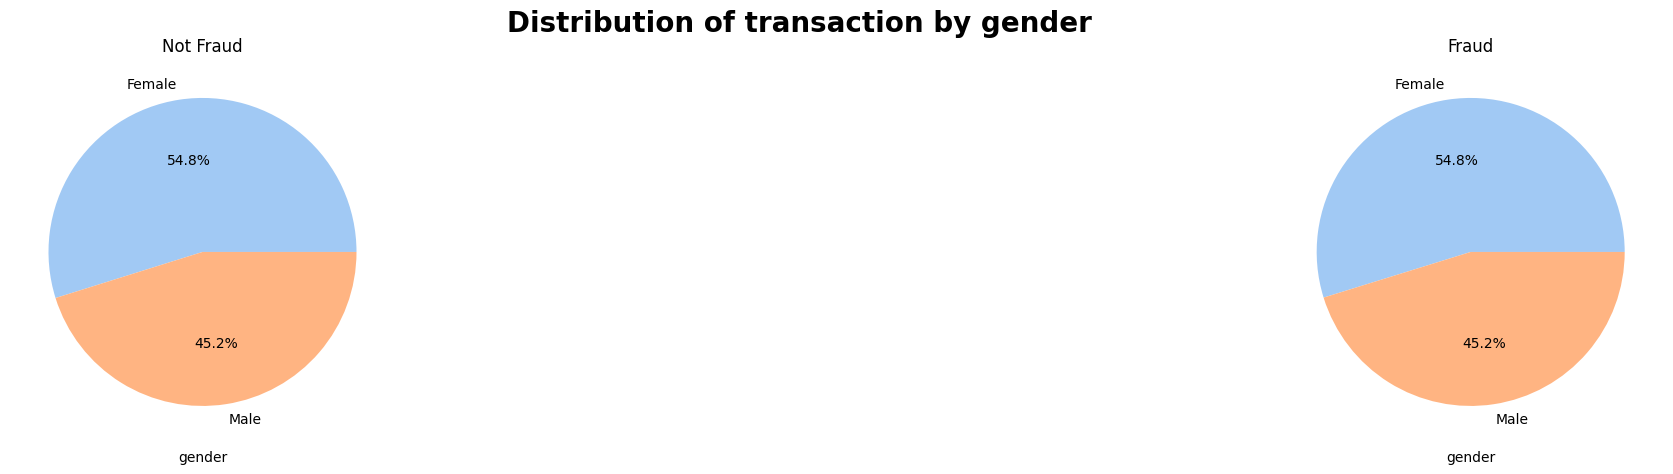

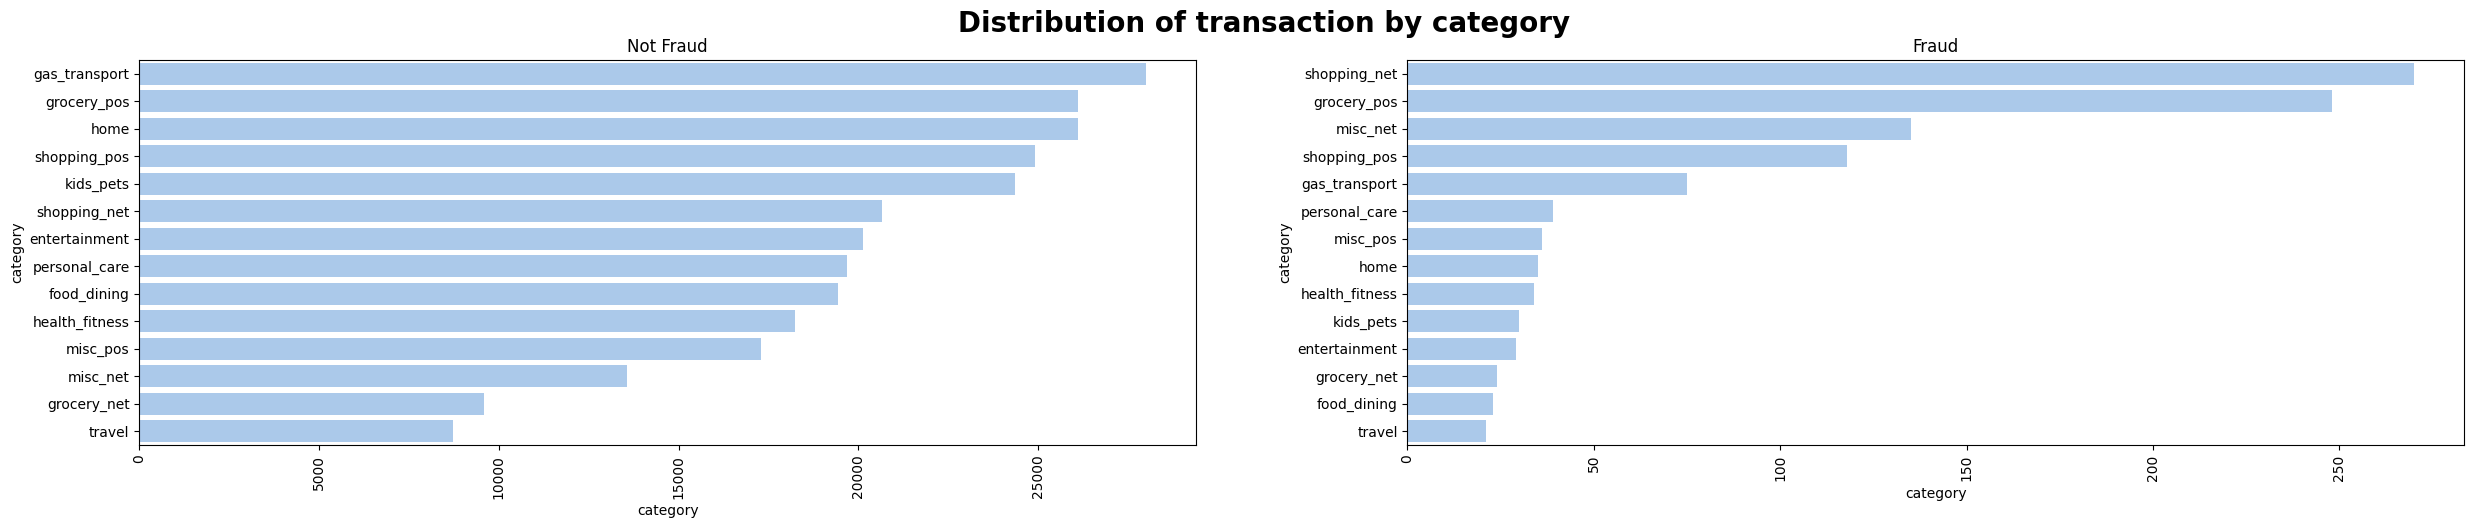

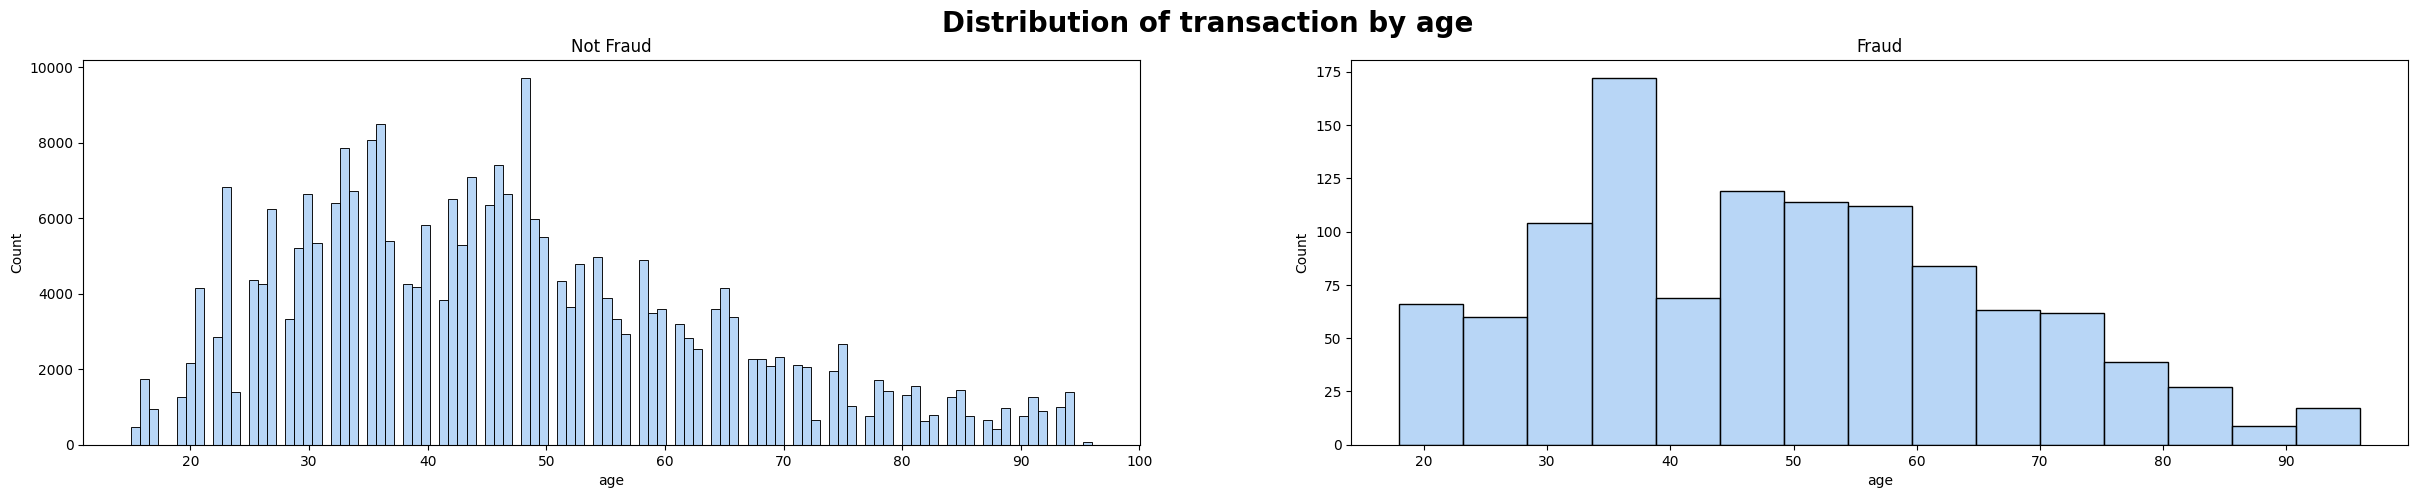

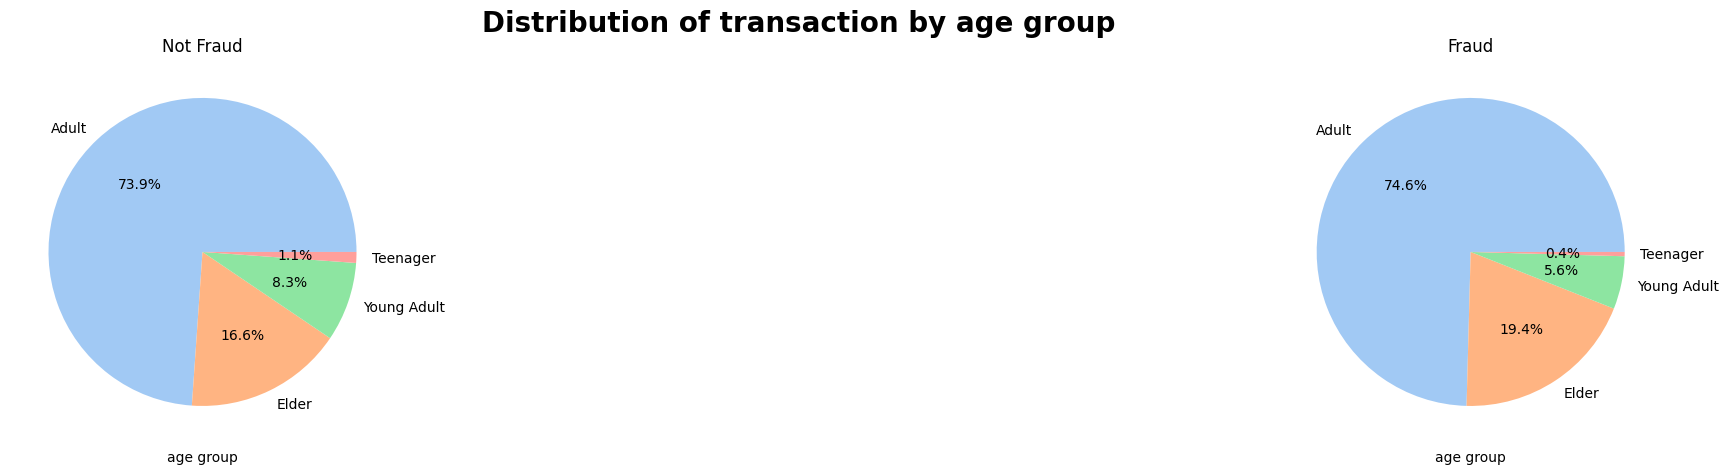

In [95]:
#ploting the overview of dataset by month, gender and category
columns = ['gender','category','age','age_group']
columns_name = ['gender','category','age','age group']
name = ['Not Fraud','Fraud']

data['fraud'] = data['is_fraud'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud')

index = 0
for col in columns:
    fig = plt.figure(figsize=(30, 5))
    plt.suptitle("Distribution of transaction by " + columns_name[index],fontsize=20,fontweight='bold')
    
    for i in range(0,2):
        plt.subplot(1,2,1+i)
        data_1 = data[data['is_fraud'] == i]
        if (col == 'gender'):
            ax = plt.pie(data_1[col].value_counts(), labels = ['Female','Male'] , autopct='%1.1f%%')
        elif (col == 'age_group'):
            ax = plt.pie(data_1[col].value_counts(), labels = data_1[col].value_counts().index , autopct='%1.1f%%')
        elif (col == 'category'):
            ax = sns.countplot(data=data_1, y=col, order = data_1[col].value_counts().index)
        else:
            ax = sns.histplot(data=data_1, x=col)
        plt.title(name[i])
        plt.xlabel(columns_name[index])
    
        if col == 'category':
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    index +=1
    plt.show()

Based on visualisation above we can see:
- There is 54,8% transaction of `female` and 45,2% transaction of `male` in `not fraud` and `fraud`
- Most distribution of `not fraud` transaction by category is from `gas_transport` meanwhile in fraud is from shopping_net
- In distribution transaction by age mostly between 30-40 in `fraud` and between 45-50 for `not fraud`
- By age group mostly `not fraud` transaction is from Adult with 73,9% and `fraud` also from Adult with 74,6%

# 5. Feature Engineering

In [96]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277860 entries, 232018 to 273475
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  277860 non-null  datetime64[ns]
 1   cc_num                 277860 non-null  float64       
 2   merchant               277860 non-null  object        
 3   category               277860 non-null  object        
 4   amt                    277860 non-null  float64       
 5   first                  277860 non-null  object        
 6   last                   277860 non-null  object        
 7   gender                 277860 non-null  object        
 8   street                 277860 non-null  object        
 9   city                   277860 non-null  object        
 10  state                  277860 non-null  object        
 11  zip                    277860 non-null  int64         
 12  lat                    277860 non-null  floa

Because the trans_date_trans_time still object, we need to change the type into datetime

## Checking Cardinality

In [97]:
# cek nilai unik di setiap kolom
data.nunique().to_frame().reset_index().rename(columns={'index':'Column Name',0:'Unique Value'})

,Column Name,Unique Value
0,trans_date_trans_time,165841
1,cc_num,904
2,merchant,693
3,category,14
4,amt,29323
5,first,341
6,last,471
7,gender,2
8,street,924
9,city,849


- `trans_date_trans_time`: This column contains 165,841 unique transaction dates and times.
- `cc_num`: This column contains 904 unique credit card numbers.
- `merchant`: This column contains 693 unique merchants.
- `category`: This column contains 14 unique categories.
- `amt`: This column contains 29,323 unique transaction amounts.
- `first`: This column contains 341 unique first names.
- `last`: This column contains 471 unique last names.
- `gender`: This column contains 2 unique genders.
- `street`: This column contains 924 unique street names.
- `city`: This column contains 849 unique cities.
- `state`: This column contains 50 unique states.
- `zip`: This column contains 912 unique zip codes.
- `lat`: This column contains 910 unique latitudes.
- `long`: This column contains 910 unique longitudes.
- `city_pop`: This column contains 835 unique city populations.
- `job`: This column contains 478 unique jobs.
- `dob`: This column contains 910 unique dates of birth.
- `trans_num`: This column contains 277,860 unique transaction numbers.
- `unix_time`: This column contains 275,041 unique Unix timestamps.
- `merch_lat`: This column contains 275,535 unique merchant latitudes.
- `merch_long`: This column contains 276,863 unique merchant longitudes.
- `is_fraud`: This column contains 2 unique values, indicating whether a transaction is fraudulent or not.
- `age`: This column contains 81 unique ages.
- `age_group`: This column contains 4 unique age groups.
- `fraud`: This column contains 2 unique values, indicating whether a transaction is fraudulent or not.

In [22]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,277860,2020-10-02 03:53:37.544591360,2020-06-21 12:14:00,2020-08-09 09:25:00,2020-10-02 23:48:30,2020-12-01 06:12:00,2020-12-31 23:59:00,NaN
cc_num,277860.0,417789306501057728.0,60416207185.0,180043000000000.0,3520550000000000.0,4635330000000000.0,4992350000000000000.0,1309674213953019648.0
amt,277860.0,69.611599,1.0,9.65,47.2,83.07,22768.11,165.419393
zip,277860.0,48822.714,1257.0,26237.0,48174.0,72042.0,99921.0,26897.007713
lat,277860.0,38.546766,20.0271,34.6689,39.3764,41.9404,65.6899,5.075503
long,277860.0,-90.230803,-165.6723,-96.8094,-87.4769,-80.1752,-67.9503,13.763818
city_pop,277860.0,88328.375887,23.0,743.0,2408.0,19685.0,2906700.0,301171.597899
unix_time,277860.0,1380686047.040139,1371816873.0,1376040330.25,1380757765.0,1385878362.0,1388534364.0,5202092.408745
merch_lat,277860.0,38.546779,19.032689,34.749887,39.386522,41.9571,66.679297,5.109589
merch_long,277860.0,-90.231087,-166.670685,-96.909791,-87.430304,-80.241755,-66.952352,13.776081


Showing the statistic summary of the dataset

In [23]:
data['merchant'] = data['merchant'].str.replace("fraud_", "")

We remove the `fraud_` in `merchant` column so it will become only the merchant name

## Splitting Between Train and Test Set

In [30]:
# Split between X & Y

X = data.drop('is_fraud', axis = 1)
y = data['is_fraud']
X

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,age,age_group
232018,2020-09-13 03:24:00,3.741250e+14,"Daugherty, Pouros and Beahan",shopping_pos,3.08,Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,-77.0282,601723,"Optician, dispensing",1970-07-20,25ace93974336dbb7062cf3a26887d74,1379042693,38.957832,-76.780390,50,Adult
50019,2020-07-07 23:30:00,4.128730e+18,"Haley, Batz and Auer",health_fitness,11.36,Monique,Martin,F,68276 Matthew Springs,Ratcliff,...,-95.0619,43,"Engineer, production",1949-10-04,11b04fc37219e2ebd23a9cd0d0a2dccb,1373239842,31.343021,-94.765200,71,Elder
45979,2020-07-06 22:58:00,2.131120e+14,"Witting, Beer and Ernser",home,33.61,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,-82.2027,1523,Research scientist (physical sciences),1984-06-03,86b6315b69585f8131d74db2f5aa976c,1373151482,33.870079,-82.745760,36,Adult
521560,2020-12-24 07:25:00,4.292740e+18,Kuhic Inc,grocery_pos,92.11,Michael,Williams,M,35822 Clayton Street Apt. 679,Great Mills,...,-76.4954,5927,Art therapist,1973-06-09,ed9659f0c2e65e2d0efd21942fa3dd96,1387869909,39.034560,-76.486413,47,Adult
29680,2020-06-30 22:08:00,2.131120e+14,"Mante, Luettgen and Hackett",health_fitness,35.29,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,-82.2027,1523,Research scientist (physical sciences),1984-06-03,458143419f0260eb537c483c3c7cfd45,1372630136,34.518228,-83.018716,36,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,2020-06-22 12:07:00,3.036410e+13,Hickle Group,shopping_pos,8.05,Samuel,Sandoval,M,0005 Morrison Land,Mounds,...,-96.0887,7163,Fitness centre manager,1982-02-05,467bf7ed696ddda84dd7af2e3793a49e,1371902842,35.973827,-95.544104,38,Adult
301755,2020-10-13 01:50:00,4.103160e+12,Herzog Ltd,misc_pos,30.91,Christopher,Adkins,M,3512 Knight Center,Lorenzo,...,-101.5277,1571,Petroleum engineer,1982-06-27,dacd09a3a77b6cd5331dded8f07060ff,1381629010,33.279507,-102.213415,38,Adult
47518,2020-07-07 10:31:00,4.005680e+15,O'Keefe-Hudson,grocery_pos,64.63,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,-90.9027,71335,Herbalist,1994-05-31,2edbd424b669608cc8a3348c7dbae673,1373193118,30.011657,-90.937415,26,Adult
317700,2020-10-20 01:14:00,3.583640e+15,Kerluke PLC,misc_net,100.81,Crystal,Gamble,F,899 Michele View Suite 960,Philadelphia,...,-75.0664,1526206,Structural engineer,1985-01-01,f84fa024d25921115f4ba7f83d6e5f02,1382231688,40.654485,-74.948465,35,Adult


Splitting between X and Y

In [31]:
# Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X Train_size: ' , X_train.shape)
print('X Test_size: ' , X_test.shape)
print('Y Train_size: ' , y_train.shape)
print('Y Test_size: ' , y_test.shape)

X Train_size:  (222288, 23)
X Test_size:  (55572, 23)
Y Train_size:  (222288,)
Y Test_size:  (55572,)


After splitting the Train and Test we got:
- X Train with 222288 rows and 23 columns
- X Test with 55572 rows and 23 columns
- Y Train with 222288 rows
- Y Test with 55572 rows

## Remove Unnecessary Columns

In [32]:
X_train = X_train.drop(['cc_num', 'zip', 'city_pop', 'trans_num', 'unix_time', 'first','last','dob'], axis=1)
X_test = X_test.drop(['cc_num', 'zip', 'city_pop', 'trans_num', 'unix_time', 'first','last','dob'], axis=1)

We remove the unnecessary columns:
- `cc_num`: is ID so we can drop it because we don't need it for analysis
- `zip`: is postal id, since we use latitude & longitude we don't need it for analysis
- `city_pop`: is population city, since we it't not correlate with our analysis based on Business Knowledge
- `trans_num`: is ID so we can drop it because we don't need it for analysis
- `unix_time`: is time transaction, so it should be transaction id so we can drop it because we don't need it for analysis
- `first` and `last`: is cardholder name, we can drop it because we don't need it for analysis
- `dob`: is cardholder date of birth, since we already got the age of the cardholder we don;t need it anymore for analysis

In [33]:
X_train.shape

(222288, 15)

Now X train got 15 columns

In [34]:
X_test.shape

(55572, 15)

Now X test got 15 columns

In [35]:
# Filter Numerical Columns into Variable
kolom_numerik = X_train.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
data_numerik_normal = []
kolom_numerik_normal = []

# Making data and columns for skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for kolom in kolom_numerik:
    skewness = X_train[kolom].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

Creating function to check the distribution of columns

In [36]:
# Showing Normally distributed columns
pd.DataFrame(data=data_numerik_normal, columns=['kolom_terdistribusi_normal', 'skewness'])

,kolom_terdistribusi_normal,skewness
0,lat,-0.207756
1,merch_lat,-0.204170


We can see `lat` and `merch_lat` is have normal distribution

In [37]:
# Showing skewed columns
pd.DataFrame(data=data_numerik_skewed, columns=['kolom_skewed', 'skewness'])

,kolom_skewed,skewness
0,amt,45.948636
1,long,-1.142059
2,merch_long,-1.139187
3,age,0.608886


- We can see `amt` have highly positif skewed
- `long` and `merch_long` have negatif skewed
- `age` have positif skewed

In [38]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

Capping the normal distribution

In [39]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test)

Capping the skewed distribution

In [40]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Creating function to show boxplot before and after handling outlier

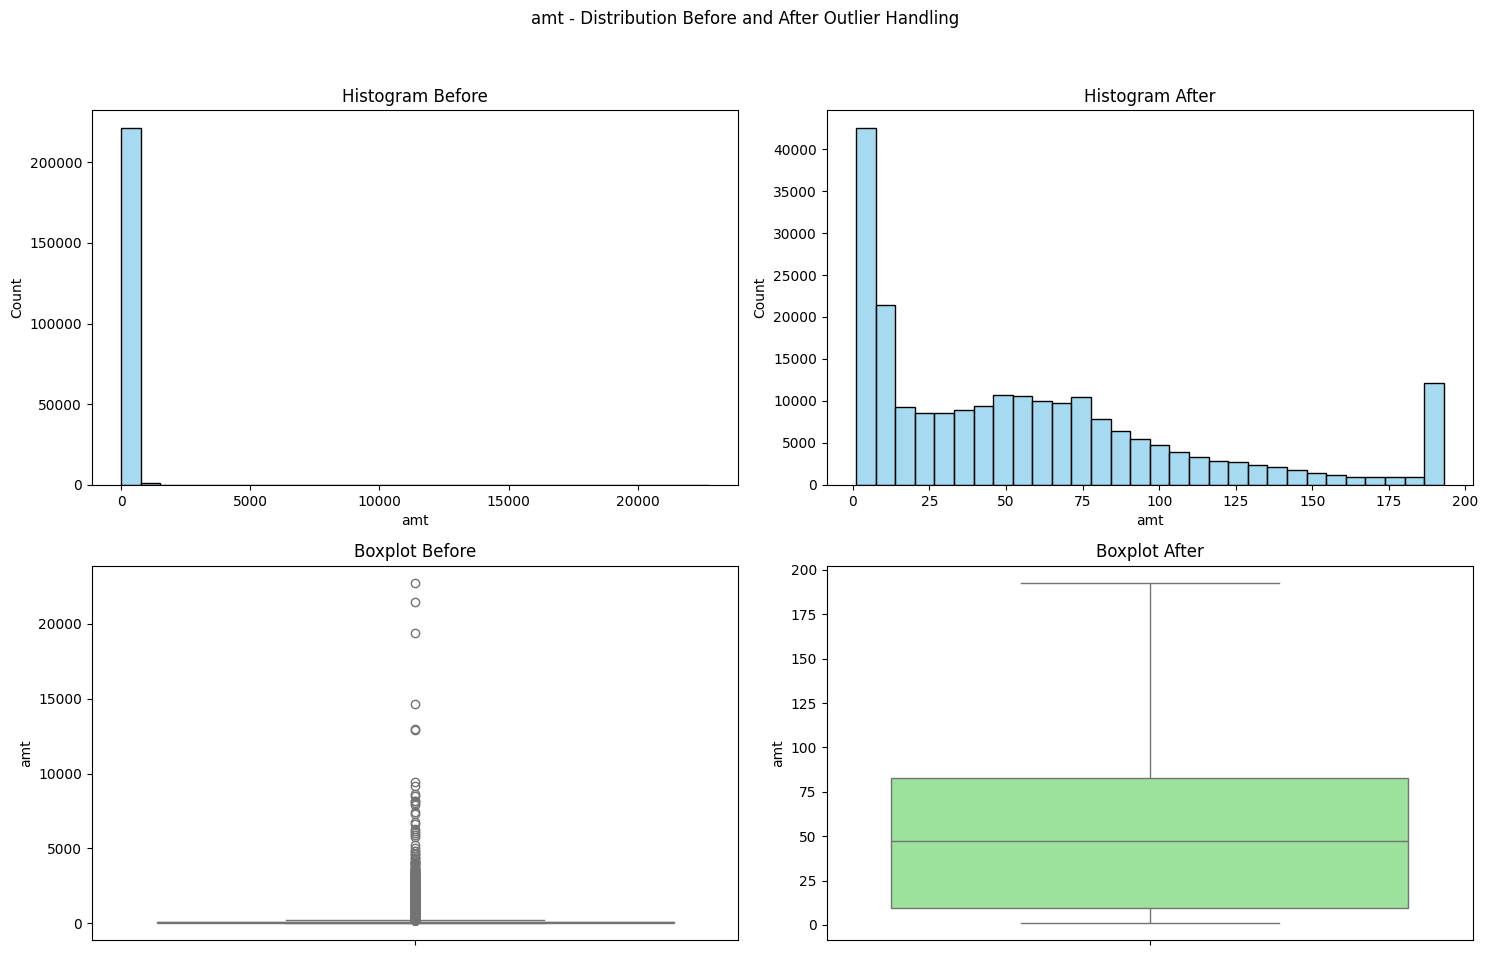

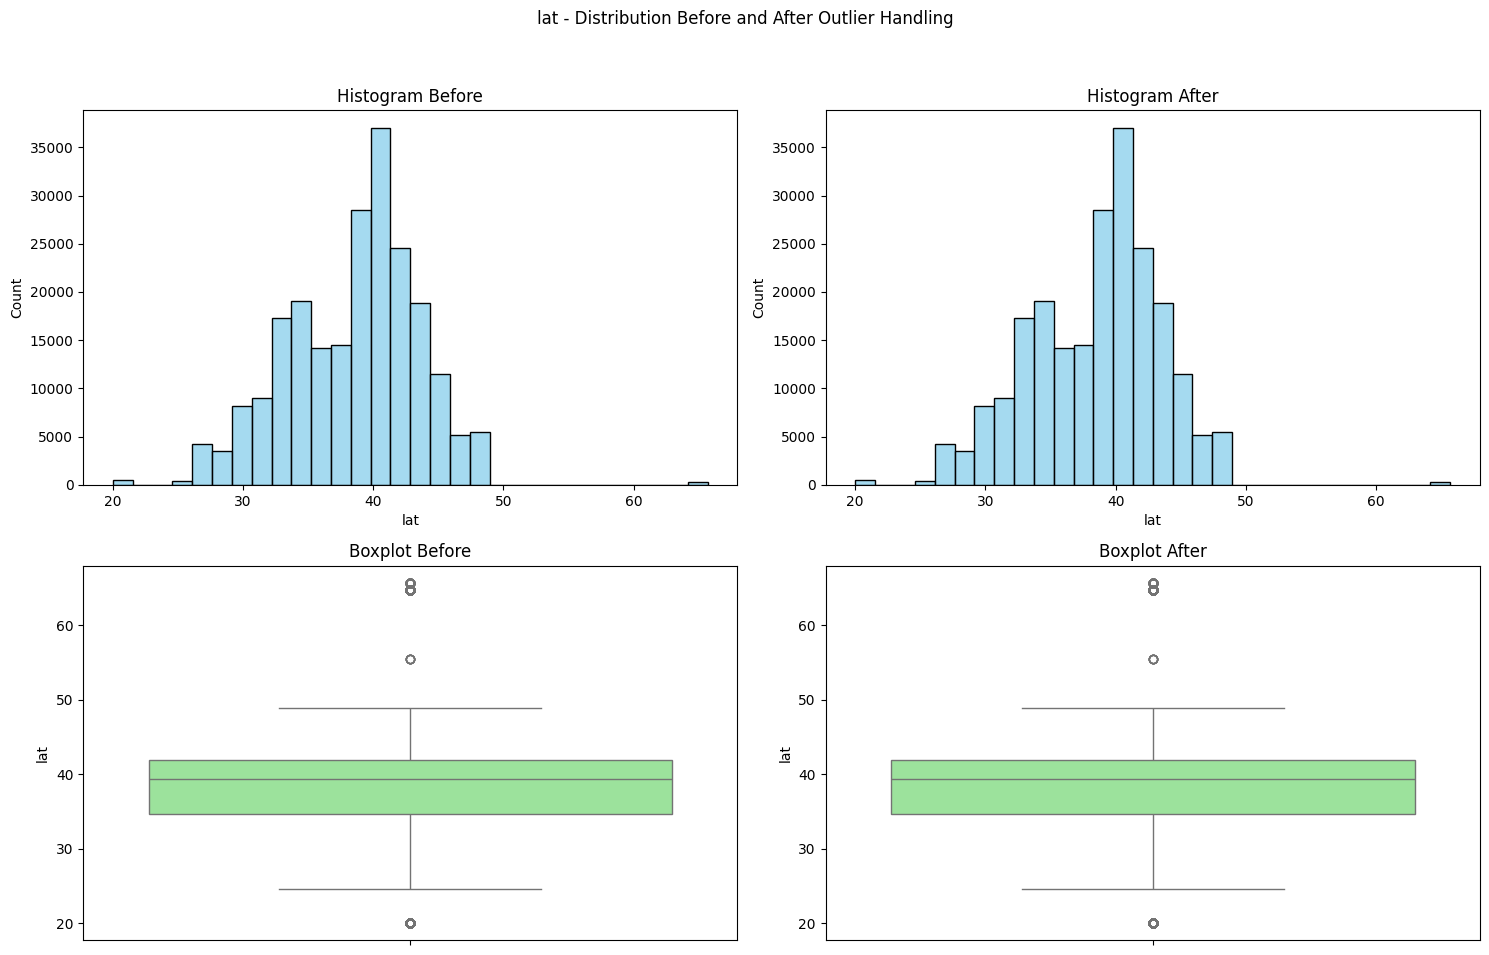

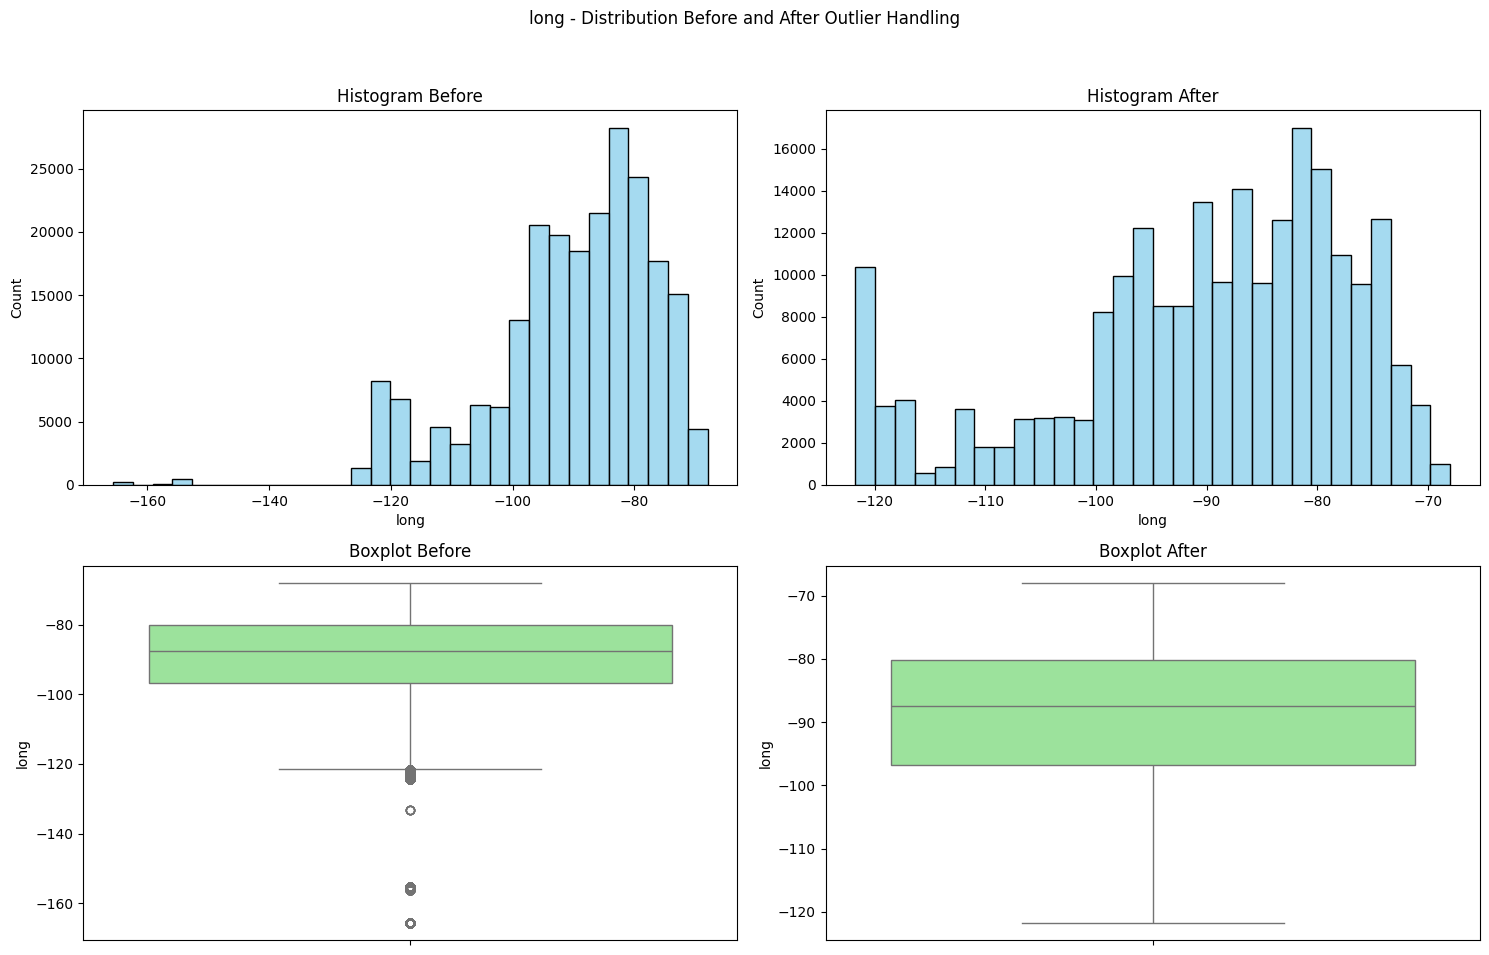

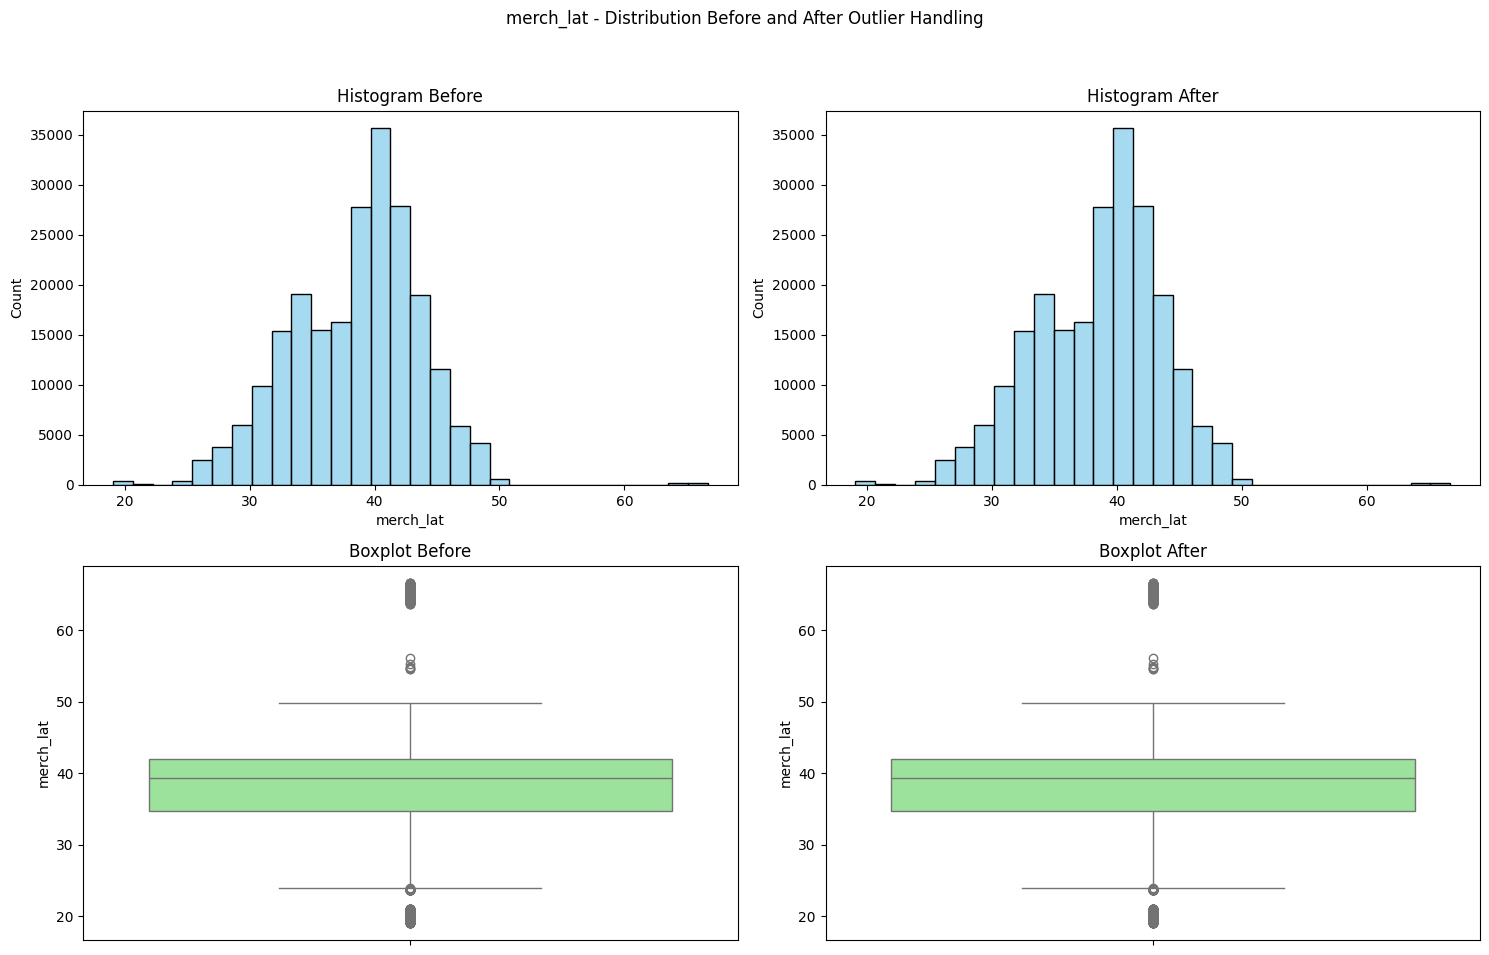

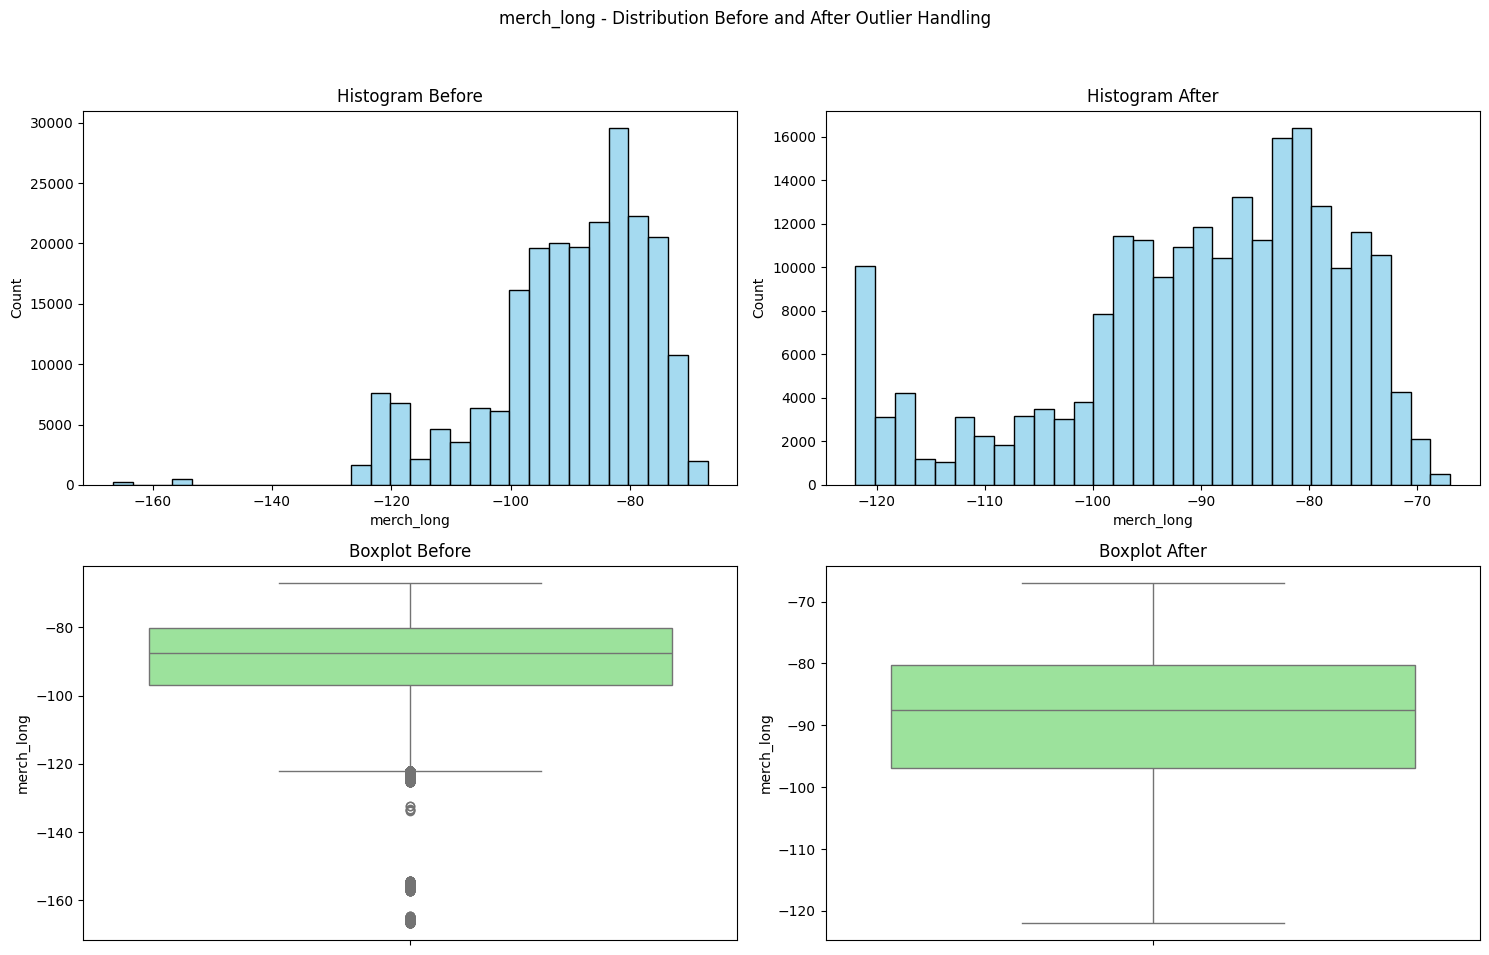

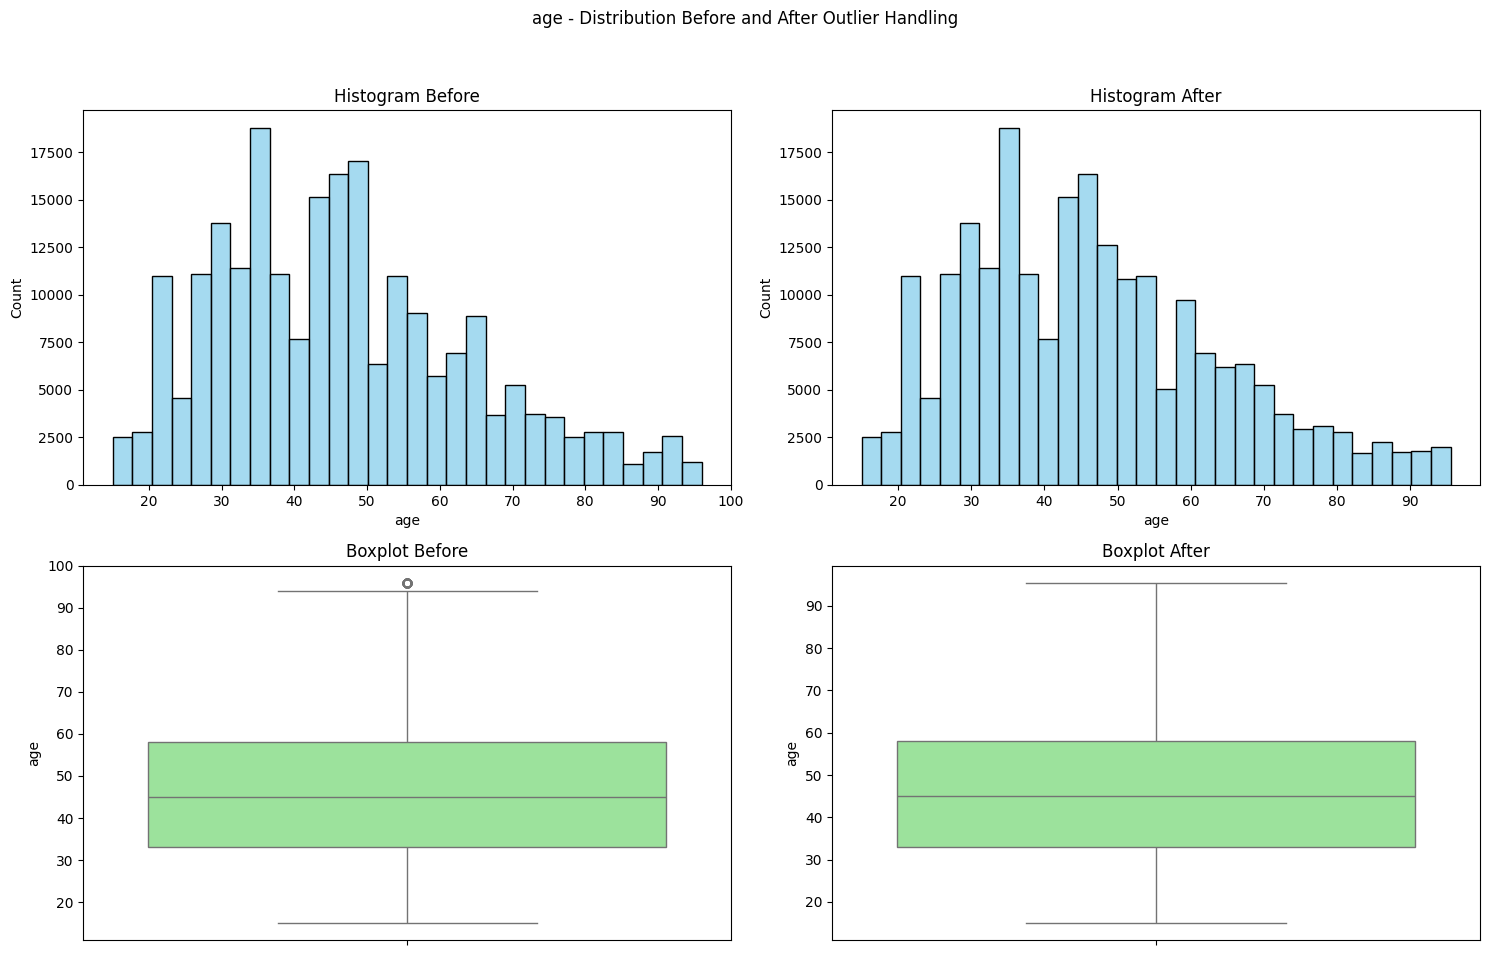

In [41]:
# Using the Function
num_cols = kolom_numerik 
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

Showing the boxplot before and after handling outlier

## Split Between Numerical Columns and Categorical Columns

In [42]:
# Get numeric and categorical column

num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

In [43]:
print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'age_group']
Numerical Columns : ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'age']


Showing the result after splitting Numerical and Categorical Columns

In [44]:
# Pengelompokkan categorical dan numerical pada data X_train dan X_test yang telah di capping 
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

Grouping categorical and numerical data to capped X train and X test

## Checking Correlation

### Categorical

In [45]:
# Checking korelasi di kolom kategori
p_values = []
interpretation = []
cols = []
corr = []

# mecari kolom korelasi di setiap kolom menggunakan kendalltau
for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  # memasukan ke list
  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  # aturan kondisi
  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else:
    interpretation.append('No Significant Correlation')

# membuat dataframe hasil dari korelasi
dfCorr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation})

dfCorr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,merchant,-2.114512e-03,2.224546e-01,No Significant Correlation
1,category,1.506052e-02,5.329233e-17,Significant Correlation
2,gender,6.340973e-04,7.649706e-01,No Significant Correlation
3,street,-1.669722e-03,3.353089e-01,No Significant Correlation
4,city,-4.791799e-07,9.997794e-01,No Significant Correlation
5,state,-5.645637e-03,1.326862e-03,Significant Correlation
6,job,-5.189039e-03,2.773594e-03,Significant Correlation
7,age_group,-2.497919e-03,2.246389e-01,No Significant Correlation


Checking the correlation in categorical columns, we can see `category`, `state`, `job` have significant correlation

### Numerical

In [46]:
# Checking korelasi di kolom numerik
p_values = []
interpretation = []
cols = []
corr = []

# mencari korelasi di setiap kolom
for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

dfCorrNum = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

dfCorrNum

,Column Name,Correlation Coefficient,P-value,Interpretation
0,amt,0.070097,4.191989e-240,Significant Correlation
1,lat,0.003900,6.592909e-02,No Significant Correlation
2,long,0.000279,8.955139e-01,No Significant Correlation
3,merch_lat,0.003764,7.596191e-02,No Significant Correlation
4,merch_long,0.000195,9.267746e-01,No Significant Correlation
5,age,0.008900,2.716815e-05,Significant Correlation


Meanwhile in numerical columns `amt` and `age` have significant correlation

In [47]:
# extract data
corrCat = (dfCorr[dfCorr['Interpretation']=='Significant Correlation'])
list_corrCat = list(corrCat['Column Name'].values)

Saving the categorical columns that have correlation

In [48]:
corrNum = dfCorrNum[dfCorrNum['Interpretation'] == 'Significant Correlation']

In [49]:
# extract data
list_corrNum = list(corrNum['Column Name'].values)
list_corrNum

['amt', 'age']

Saving the numerical category that have correlation

<Axes: >

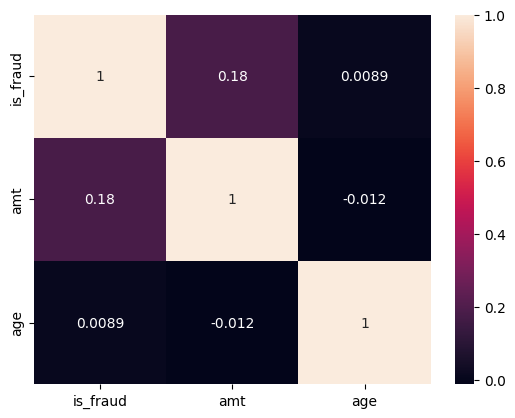

In [50]:
sns.heatmap(data[['is_fraud']+list_corrNum].corr(),annot=True)

Showing the heatmap of numerical category

In [51]:
# Membuat dataframe Categorical & Numerical
selected_cat_col = list_corrCat
selected_num_col = list_corrNum


X_train_cat = X_train_cat[selected_cat_col]
X_train_num = X_train_num[selected_num_col]

X_test_cat = X_test_cat[selected_cat_col]
X_test_num = X_test_num[selected_num_col]

Creating dataframe for correlation categorical and numerical

In [52]:
# Checking categorical
X_train_cat

,category,state,job
270122,misc_pos,OR,Museum education officer
135186,kids_pets,VA,Chief Operating Officer
398870,travel,CA,Chartered public finance accountant
382266,misc_pos,ID,Cartographer
287398,personal_care,IL,Environmental consultant
...,...,...,...
484423,shopping_pos,SC,"Sales professional, IT"
275676,home,OR,Economist
152453,kids_pets,IL,Environmental consultant
509106,shopping_net,WV,Exhibition designer


Showing the X train of categorical

In [53]:
# Checking the numerical data
X_train_num

,amt,age
270122,2.20,78.0
135186,28.83,44.0
398870,6.25,61.0
382266,3.65,55.0
287398,33.75,48.0
...,...,...
484423,168.61,23.0
275676,83.35,27.0
152453,52.85,48.0
509106,8.73,40.0


Showing the X train of numerical

## Concate

In [54]:
# Concatenate numerical and categorical features along columns (axis=1)
X_train_con = pd.concat([X_train_num, X_train_cat], axis=1)

In [55]:
# Concatenate numerical and categorical features along columns (axis=1)
X_test_con = pd.concat([X_test_num, X_test_cat], axis=1)

Concate the X train and X test

In [56]:
X_train_con

,amt,age,category,state,job
270122,2.20,78.0,misc_pos,OR,Museum education officer
135186,28.83,44.0,kids_pets,VA,Chief Operating Officer
398870,6.25,61.0,travel,CA,Chartered public finance accountant
382266,3.65,55.0,misc_pos,ID,Cartographer
287398,33.75,48.0,personal_care,IL,Environmental consultant
...,...,...,...,...,...
484423,168.61,23.0,shopping_pos,SC,"Sales professional, IT"
275676,83.35,27.0,home,OR,Economist
152453,52.85,48.0,kids_pets,IL,Environmental consultant
509106,8.73,40.0,shopping_net,WV,Exhibition designer


Showing the final X train

In [57]:
X_test_con

,amt,age,category,state,job
325907,84.04,49.0,gas_transport,IA,Engineering geologist
192737,36.30,32.0,gas_transport,OH,Quantity surveyor
396720,1.88,22.0,shopping_pos,AL,Educational psychologist
492148,1.70,25.0,personal_care,MI,Historic buildings inspector/conservation officer
493878,35.09,23.0,home,NV,Immunologist
...,...,...,...,...,...
450194,112.44,57.0,grocery_pos,PA,Operations geologist
551232,66.17,70.0,kids_pets,FL,Medical technical officer
385131,4.54,59.0,travel,KY,Commissioning editor
360288,1.49,76.0,misc_net,OK,"Psychotherapist, child"


Showing the final X test

# 6. Model Definition

Pipelines automate the machine learning workflow, allowing data to be transformed and correlated into a model in a fully automated manner. As we want to see which classification model works best for this dataset, **pipeline can save a significant amount of time and effort**. 

There are some `steps` that we will be using in all of our pipeline models, such as :

1. For **`Feature Scaling`** in this pipeline, we are going to be using the `MinMax Scaler` to scale the data to a specific range, which can help normalize the data and ensure that all features have the same scale. `MinMax Scaler` is useful when the features have different units or ranges, as it can prevent features with larger ranges from dominating the learning process, and for Encoding we use `OrdinalEncoder` to encode the categorical data based on their order because the distance between the values are not quantifiable, but we can determine the relative order of the values

2. For making a **`Pipeline with Multiple Variable`**, in our case a numerical and categorical data, we are going to be using a `Column Transformer` because it allow us to **use different preprocessing steps**

3. For **`Model Definition`**, we are going to be using the `SVC Machine`, `KNN`, `Decision Tree`, `Random Forest`, and `XGBoost` model to see which model is best to fit the data

4. For **`Model Training`**, we are going to fit each model to the final features and balanced target

5. For **`Model Evaluation`**, we are going to measure the `recall`, because we want to evaluate **the false negative**. We need to evaluate the false negative because if the model predict false negative, the cardholder transaction will detected as **legit** and **fraud** transaction will not get any treatment

6. For **`Cross Validation`**, we are using `10 folds` because we want to **reduce overfitting**

# 7. Model Training

### Feature Selection

In [58]:
# Membuat dataframe Categorical & Numerical
selected_cat_col = list_corrCat
selected_num_col = list_corrNum

Selecting the categorical and numerical that have correlation

## K-Nearest Neighbors

In [59]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sampling', SMOTE(sampling_strategy='auto', random_state=42)),  
    ('classification', KNeighborsClassifier())
])

#Model Training
model_pipeline.fit(X_train_con, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_con)
y_test_pred = model_pipeline.predict(X_test_con)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_con,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
knn_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(knn_results_df)

           Metric     Value
0    Train Recall  0.909692
1     Test Recall  0.569378
2  CV Recall Mean  0.512125
3   CV Recall Std  0.050694


- Train Recall: This metric measures the recall of the model on the training set. The value is 0.909692, which means that the model can correctly identify 90.97% of the true positive cases in the training set.

- Test Recall: This metric measures the recall of the model on the test set. The value is 0.569378, which means that the model can correctly identify 56.94% of the true positive cases in the test set.

- CV Recall Mean: This metric is the mean recall score calculated over multiple cross-validation folds. The value is 0.512125, which means that on average, the model can correctly identify 51.21% of the true positive cases across all cross-validation folds.

- CV Recall Std: This metric is the standard deviation of the recall scores calculated over multiple cross-validation folds. The value is 0.050694, which means that the recall scores have a relatively low variability across different cross-validation folds.

Overall, the result shows that the model has a high recall score on the training set, but the recall score drops significantly on the test set. This suggests that the model may be overfitting to the training data and may not generalize well to new, unseen data. The cross-validation recall scores also indicate that the model's performance is somewhat inconsistent, with a relatively low mean recall score and a non-zero standard deviation.

## Decision Tree

In [63]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sampling', SMOTE(sampling_strategy='auto', random_state=42)),  
    ('classification', DecisionTreeClassifier())
])

#Model Training
model_pipeline.fit(X_train_con, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_con)
y_test_pred = model_pipeline.predict(X_test_con)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_con,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
dt_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(dt_results_df)

           Metric     Value
0    Train Recall  0.851322
1     Test Recall  0.488038
2  CV Recall Mean  0.461453
3   CV Recall Std  0.031617


- Train Recall: This metric measures the recall of the model on the training set. The value is 0.851322, which means that the model can correctly identify 85.13% of the true positive cases in the training set.

- Test Recall: This metric measures the recall of the model on the test set. The value is 0.488038, which means that the model can correctly identify 48.80% of the true positive cases in the test set.

- CV Recall Mean: This metric is the mean recall score calculated over multiple cross-validation folds. The value is 0.461453, which means that on average, the model can correctly identify 46.15% of the true positive cases across all cross-validation folds.

- CV Recall Std: This metric is the standard deviation of the recall scores calculated over multiple cross-validation folds. The value is 0.031617, which means that the recall scores have a relatively low variability across different cross-validation folds.

Overall, the result shows that the model has a high recall score on the training set, but the recall score drops significantly on the test set. This suggests that the model may be overfitting to the training data and may not generalize well to new, unseen data. The cross-validation recall scores also indicate that the model's performance is somewhat inconsistent, with a relatively low mean recall score and a non-zero standard deviation.

## Random Forest

In [64]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sampling', SMOTE(sampling_strategy='auto', random_state=42)),  
    ('classification', RandomForestClassifier())
])

#Model Training
model_pipeline.fit(X_train_con, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_con)
y_test_pred = model_pipeline.predict(X_test_con)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_con,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
rf_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(rf_results_df)

           Metric     Value
0    Train Recall  0.893172
1     Test Recall  0.535885
2  CV Recall Mean  0.511013
3   CV Recall Std  0.026928


- Train Recall: This metric measures the recall of the model on the training set. The value is 0.893172, which means that the model can correctly identify 89.32% of the true positive cases in the training set.

- Test Recall: This metric measures the recall of the model on the test set. The value is 0.535885, which means that the model can correctly identify 53.59% of the true positive cases in the test set.

- CV Recall Mean: This metric is the mean recall score calculated over multiple cross-validation folds. The value is 0.511013, which means that on average, the model can correctly identify 51.10% of the true positive cases across all cross-validation folds.

- CV Recall Std: This metric is the standard deviation of the recall scores calculated over multiple cross-validation folds. The value is 0.026928, which means that the recall scores have a relatively low variability across different cross-validation folds.

Overall, the result shows that the model has a high recall score on the training set, but the recall score drops significantly on the test set. This suggests that the model may be overfitting to the training data and may not generalize well to new, unseen data. The cross-validation recall scores also indicate that the model's performance is somewhat inconsistent, with a relatively low mean recall score and a non-zero standard deviation.

## XGBoost

In [65]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sampling', SMOTE(sampling_strategy='auto', random_state=42)),  
    ('classification',XGBClassifier())
])

#Model Training
model_pipeline.fit(X_train_con, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_con)
y_test_pred = model_pipeline.predict(X_test_con)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_con,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
xg_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(xg_results_df)

           Metric     Value
0    Train Recall  0.892070
1     Test Recall  0.789474
2  CV Recall Mean  0.747863
3   CV Recall Std  0.044309


- Train Recall: This metric measures the recall of the model on the training set. The value is 0.892070, which means that the model can correctly identify 89.21% of the true positive cases in the training set.

- Test Recall: This metric measures the recall of the model on the test set. The value is 0.789474, which means that the model can correctly identify 78.95% of the true positive cases in the test set.

- CV Recall Mean: This metric is the mean recall score calculated over multiple cross-validation folds. The value is 0.747863, which means that on average, the model can correctly identify 74.79% of the true positive cases across all cross-validation folds.

- CV Recall Std: This metric is the standard deviation of the recall scores calculated over multiple cross-validation folds. The value is 0.044309, which means that the recall scores have a relatively low variability across different cross-validation folds.

Overall, the result shows that the model has a high recall score on both the training and test sets, indicating that the model is able to correctly identify a large proportion of the true positive cases. The cross-validation recall scores also indicate that the model's performance is consistent, with a high mean recall score and a low standard deviation.

## Support Vector Machines

In [66]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sampling', SMOTE(sampling_strategy='auto', random_state=42)),  
    ('classification',SVC())
])

#Model Training
model_pipeline.fit(X_train_con, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_con)
y_test_pred = model_pipeline.predict(X_test_con)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train_con,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
svc_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(svc_results_df)

After takes too much time `(Over 250 minutes)` of training the SVM model, we decided to passthrough the model because the limitation of computation resource to handle size of the data, and decided to continue analyze the rest of models

## Overall Summary

Based on the recall scores provided in the tables, the XGB model appears to be the best model. It has the highest test recall score of 0.789474, which means that it can correctly identify 78.95% of the true positive cases in the test set. It also has a high train recall score of 0.892070, indicating that it can correctly identify a large proportion of the true positive cases in the training set.

Furthermore, the XGB model has a high CV recall mean score of 0.747863, indicating that its performance is consistent across different cross-validation folds. The CV recall standard deviation is also relatively low, suggesting that the model's performance is stable.

In contrast, the `KNN`, `DT`, and `RF` models have much lower test recall scores, indicating that they are less effective at identifying true positive cases in the test set. And for `SVM`, because the limitation of computation resource and takes too much time `(Over 250 minutes)` to training the `SVM` model, we decided to passthrough the model.

Therefore, based on the rest recall scores provided, the XGB model appears to be the best model for this particular use case. 

# 7. Model Evaluation

### Hyperparameter Tuning

The **hyperparameters** chosen for the XGBoost classifier are:

1. `classification__n_estimators`: Controls the number of trees in the ensemble. Increasing the number of trees can improve the model's performance but also increases the training time.
2. `classification__learning_rate`: Controls the learning rate of the model. The learning rate determines the step size at each iteration of the gradient descent algorithm. Smaller learning rates result in slower convergence but may lead to better final performance.
classification__max_depth: Controls the maximum depth of each tree. Deeper trees can capture more complex relationships in the data but are also more prone to overfitting.
3. `classification__min_child_weight`: Controls the minimum child weight for tree splitting. This hyperparameter helps prevent overfitting by requiring a minimum number of samples in each leaf node.
4. `classification__colsample_bytree`: Controls the subsample ratio for training data. This hyperparameter randomly selects a fraction of the features for each tree, which can help reduce overfitting and improve generalization.
5. `classification__reg_alpha`: Controls the L1 regularization strength. L1 regularization adds a penalty term to the loss function that encourages sparse solutions, i.e., models with fewer non-zero coefficients.
6. `classification__reg_lambda`: Controls the L2 regularization strength. L2 regularization adds a penalty term to the loss function that encourages smaller coefficient values.
7. `classification__gamma`: Controls the gamma value for regularization. This hyperparameter determines the minimum improvement required to split a node in the tree.
8. `classification__objective`: Controls the objective function for multi-class classification. The multi:softmax objective is used for multiclass classification with the softmax activation function. The multi:softprob objective is used for multiclass classification with the softmax activation function and outputs probabilities for each class.
9. `classification__num_class`: Controls the number of classes in the classification problem. This hyperparameter is set to the number of unique classes in the training data.
10. `classification__random_state`: Controls the random seed for reproducibility. Setting the random seed ensures that the same sequence of random numbers is generated, which can help reproduce the results.

We use **RandomizedSearchCV** to efficiently search for the optimal hyperparameters for our XGBoost model and improve its performance on dataset:

1. `model_pipeline`: The pipeline containing the XGBoost model to be optimized.
2. `param_distributions`: The hyperparameter distributions to search, defined in the param_grid dictionary.
3. `n_iter`: The number of iterations for the randomized search. In each iteration, a random combination of hyperparameters is sampled from the param_grid and evaluated.
4. `cv`: The number of folds for cross-validation. The search process uses cross-validation to evaluate the model's performance on unseen data.
scoring: The scoring function to evaluate the model's performance. This can be a metric such as accuracy, F1-score, or mean squared error.
verbose: The verbosity level (0-10) for printing search progress. A higher value means more detailed output.
5. `n_jobs`: The number of jobs to run in parallel. Setting n_jobs=-1 means that all available CPU cores will be used.
6. `random_state`: The random seed for reproducibility. This ensures that the same sequence of random numbers is generated, which can help reproduce the results.

In [72]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_col),
    ('cat', cat_pipeline, selected_cat_col)
])

# Define model pipeline
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessing_pipeline),
    ('sampling', SMOTE(sampling_strategy='auto', random_state=42)),  
    ('classification', XGBClassifier())
])

#Model Training
model_pipeline.fit(X_train_con, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train_con)
y_test_pred = model_pipeline.predict(X_test_con)

# Cross Validation
scorer = make_scorer(recall_score)
recall_train_cross_val = cross_val_score(model_pipeline,
                                          X_train_con,
                                          y_train,
                                          cv=10,
                                          scoring=scorer)

# Define Hyperparameters
param_grid = {
    'classification__n_estimators': [10, 50, 100, 200],
    'classification__learning_rate': [0.01, 0.1, 0.5, 1],
    'classification__max_depth': [3, 5, 8, 10],
    'classification__min_child_weight': [1, 3, 5],
    'classification__colsample_bytree': [0.5, 0.8, 1],
    'classification__gamma': [0, 0.1, 0.5],
    'classification__reg_alpha': [0, 1, 10],
    'classification__reg_lambda': [0, 1, 10],
    'classification__objective': ['multi:softmax', 'multi:softprob'],
    'classification__num_class': [y_train.nunique()],
    'classification__random_state': [42],
}

# Define Randomized Search CV
random_search = RandomizedSearchCV(model_pipeline,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=10,
                                   scoring=scorer,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# Randomized Search CV Training
random_search.fit(X_train_con, y_train)

# Print best hyperparameters
print("Best hyperparameters found:")
print(random_search.best_params_, '\n')

# Evaluate the best model
XGB_best_model = random_search.best_estimator_

# Check Performance Model against Train-set
y_pred_train = XGB_best_model.predict(X_train_con)
y_pred_test = XGB_best_model.predict(X_test_con)

# Create a dataframe to store the results
xgb_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std', 'Train Recall Score After Tuning', 'Test Recall Score After Tuning'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std(), recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)]
})

print(xgb_results_df)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters found:
{'classification__reg_lambda': 10, 'classification__reg_alpha': 1, 'classification__random_state': 42, 'classification__objective': 'multi:softmax', 'classification__num_class': 2, 'classification__n_estimators': 10, 'classification__min_child_weight': 1, 'classification__max_depth': 3, 'classification__learning_rate': 1, 'classification__gamma': 0, 'classification__colsample_bytree': 1} 

                            Metric     Value
0                     Train Recall  0.892070
1                      Test Recall  0.789474
2                   CV Recall Mean  0.747863
3                    CV Recall Std  0.044309
4  Train Recall Score After Tuning  0.844714
5   Test Recall Score After Tuning  0.851675


In summary, the best hyperparameters found during the tuning process achieved a recall score of **0.85168** on the test set when the recall score before tuning **0.789474**, indicating that the model was able to correctly identify **85.17%** of the actual positive instances in the test set when before is only **78.94%**.

# 8. Model Saving

In [73]:
with open('XGB_best_model.pkl', 'wb') as file_1:
  pickle.dump(XGB_best_model, file_1)

Saving our best model into file using pickle

# 9. Model Inference

For Model Inference we do the test on the other notebook

# 10. Conclusion

## EDA

- Job, State and category have significant correlation with fraud 
- There is 276743 total number of transaction `not fraud`, 1117 total number of transaction `fraud`, with 18745296.5 total transaction amount of `not fraud` and 1117 total transaction amount of `fraud`. The data is imbalance so we use SMOTE to balancing the data.
- There is 54,8% transaction of `female` and 45,2% transaction of `male` in `not fraud` and `fraud`, and after we did correlation test, gender is not influence the fraud.
- Most distribution of `not fraud` transaction by category is from `gas_transport` meanwhile in fraud is from `shopping_net`
- In distribution transaction by age mostly between 30-40 in `fraud` and between 45-50 for `not fraud`, and after we did correlation test age is influence the fraud.
- By age group mostly `not fraud` transaction is from Adult with 73,9% and `fraud` also from Adult with 74,6%, after we did correlation test, age group is not influence the fraud so for our analysis we use age

## Model

* In this program, 6 types of modeling have been created, namely KNN, SVM, Random Forest, Decision Tree, XGBoost models. We do balancing the data using `SMOTE` with `sampling strategy = auto`, from the performance of the five, XGBoost is the best model tested. When compared with other models, this model is the best model because it has the highest recall value
* In this model the metric that must be looked at is `recall` to minimize the False Negative. After we tuning the model XGBoost itself predicted `recall` value is `0.851675`.
* In terms of model accuracy, this XGBoost tuning model has a very good value for recall where the false negative value obtained is very small. The recall value `0.851675` is very close to the optimal value of recall which is `1`.
* From predicting, the model can be used using random data and produce prediction results based on the entered features

## Business Insight

This model can be used to improve fraud detection and prevention efforts. By accurately identifying fraudulent transactions, businesses can take action to prevent further losses and protect their customers. Additionally, the model can be used to identify patterns and trends in fraudulent behavior, which can help businesses to develop more effective fraud prevention strategies.

Furthermore, the use of random data to generate predictions based on entered features suggests that the model is flexible and can be applied to a wide range of scenarios. This means that businesses can use the model to analyze data from different sources and make predictions about fraudulent behavior in real-time.

Overall, the XGBoost model provides a valuable tool for businesses to improve their fraud detection and prevention efforts, and can help to reduce losses and protect customers. By accurately identifying fraudulent transactions and identifying patterns in fraudulent behavior, businesses can take proactive steps to prevent fraud and improve their overall security posture.

## Conceptual Problem
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
* Bagging atau Bootstrap Aggregating adalah sebuah teknik dalam machine learning yang digunakan untuk meningkatkan kinerja model prediksi dengan cara menggabungkan hasil dari beberapa model yang dibangun dengan dataset yang sama tetapi dengan sampel yang diambil secara acak dengan penggantian. Bagging bertujuan untuk mengurangi variance (variansi) dari model, sehingga meningkatkan kestabilan dan kinerja prediksi. Cara kerja bagging adalah sebagai berikut:
    * Pertama, dataset awal diambil sampel dengan penggantian (bootstrap sampling) untuk membuat beberapa dataset latihan yang berbeda.
    * Kemudian, model yang sama dibangun pada setiap dataset latihan.
    * Akhirnya, hasil prediksi dari setiap model diambil secara rata-rata (untuk regresi) atau melalui voting (untuk klasifikasi) untuk menghasilkan prediksi akhir.
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
* Random Forest: Random Forest adalah sebuah algoritma ensemble learning yang terdiri dari kumpulan pohon keputusan. Setiap pohon keputusan dalam Random Forest dibangun secara independen menggunakan subset dari dataset latihan yang diambil secara acak. Prediksi akhir dari Random Forest diambil melalui majority voting dari semua pohon keputusan.
* Boosting: Algoritma Boosting, seperti Gradient Boosting atau AdaBoost, juga merupakan algoritma ensemble learning yang menggabungkan hasil dari beberapa model yang lemah (weak learners) untuk membentuk model yang kuat (strong learner). Cara kerja boosting adalah dengan membangun model secara berurutan, di mana setiap model berikutnya berfokus pada sampel yang sulit diprediksi oleh model sebelumnya. Prediksi akhir diambil dengan cara memberikan bobot pada hasil prediksi dari setiap model berdasarkan kinerja mereka.
3. Jelaskan apa yang dimaksud dengan Cross Validation !
* Cross Validation adalah sebuah teknik yang digunakan untuk mengevaluasi kinerja dari suatu model machine learning dengan cara membagi dataset menjadi beberapa subset (fold) yang saling tumpang tindih, kemudian melatih dan menguji model pada setiap fold secara bergantian. Hal ini dilakukan untuk menghindari overfitting dan memberikan estimasi yang lebih baik terhadap kinerja model pada data baru yang belum pernah dilihat sebelumnya. Salah satu metode cross validation yang umum digunakan adalah k-fold cross validation, di mana dataset dibagi menjadi k subset, dan model dilatih dan diuji sebanyak k kali, di mana setiap subset digunakan sebagai data uji satu kali. Hasil dari k percobaan tersebut kemudian diambil rata-ratanya untuk mendapatkan estimasi kinerja model secara keseluruhan.